In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
RANDOM_STATE = 2020

In [10]:
# df = pd.read_csv('./merge_all_w_target.csv')
# df.head()

In [11]:
df_work_on = pd.read_pickle('./df_work_on.pkl')
df_work_on.head()

,device_id,gender,age,group,age_cate,lat_mean,lat_std,lat_median,long_mean,long_std,...,br_model_vivo-X5Max+,br_model_vivo-X5Pro,br_model_vivo-X5SL,br_model_vivo-X6 D,br_model_vivo-Xplay3S,br_model_vivo-Y23L,br_model_vivo-Y27,enc_by_device_4_event_id,enc_by_device_4_app_id,enc_by_device_4_label_id
0,-9.222957e+18,M,36.0,M32-38,A32-40,18.552000,9.348188,23.19,90.592000,45.648503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65,73,57
1,-9.221026e+18,F,31.0,F29-32,A29-31,27.721361,9.376818,30.87,102.692721,34.736061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147,39,62
2,-9.220831e+18,M,19.0,M22-,A22-,0.000000,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,13,24
3,-9.220062e+18,M,40.0,M39+,A40+,34.964231,20.383561,46.60,93.666346,54.605899,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,85,122
4,-9.218961e+18,F,53.0,F43+,A40+,0.000000,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,30,59


In [12]:
df_work_on.columns

Index(['device_id', 'gender', 'age', 'group', 'age_cate', 'lat_mean',
       'lat_std', 'lat_median', 'long_mean', 'long_std',
       ...
       'br_model_vivo-X5Max+', 'br_model_vivo-X5Pro', 'br_model_vivo-X5SL',
       'br_model_vivo-X6 D', 'br_model_vivo-Xplay3S', 'br_model_vivo-Y23L',
       'br_model_vivo-Y27', 'enc_by_device_4_event_id',
       'enc_by_device_4_app_id', 'enc_by_device_4_label_id'],
      dtype='object', length=235)

In [13]:
# columns
col_key = ['device_id']
# df_original.columns[1:5]
col_target = ['gender', 'age', 'group', 'age_cate']
# df_original.columns[5:11]
col_gps = ['lat_mean', 'lat_std', 'lat_median', 'long_mean', 'long_std',
       'long_median']
# df_original.columns[11:12]
col_event_count = ['event_count']
# df_original.columns[12:12+24]
col_hour = ['hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']
# df_original.columns[36:36+51]
col_label = ['label__-1', 'label__128', 'label__130', 'label__152', 'label__168',
       'label__179', 'label__209', 'label__251', 'label__252', 'label__256',
       'label__262', 'label__263', 'label__302', 'label__303', 'label__306',
       'label__405', 'label__548', 'label__549', 'label__564', 'label__704',
       'label__710', 'label__713', 'label__714', 'label__719', 'label__721',
       'label__730', 'label__751', 'label__756', 'label__757', 'label__761',
       'label__774', 'label__775', 'label__777', 'label__778', 'label__779',
       'label__781', 'label__782', 'label__783', 'label__786', 'label__787',
       'label__794', 'label__795', 'label__854', 'label__909', 'label__932',
       'label__959', 'label__960', 'label__1007', 'label__1012', 'label__1014',
       'label__1015']
# df_original.columns[87:87+20]
col_app = ['app__-6590029937880196169', 'app__-5720078949152207372',
       'app__-3955212733485100109', 'app__-2320783822570582843',
       'app__-538061441862183033', 'app__33792862810792679',
       'app__628020936226491308', 'app__3433289601737013244',
       'app__3683147815759994238', 'app__3717049149426646122',
       'app__4244331088397413857', 'app__4348659952760821294',
       'app__5729517255058371973', 'app__5927333115845830913',
       'app__6284164581582112235', 'app__7348340405200054701',
       'app__7460082553072507347', 'app__8693964245073640147',
       'app__8948670408023620661', 'app__9112463114311278255']
# df_original.columns[107:107+21]
col_brand = ['brand_A plus', 'brand_China Mobile', 'brand_Gionee', 'brand_HTC',
       'brand_Huawei', 'brand_Kupai', 'brand_LG', 'brand_Lenovo',
       'brand_Meizu', 'brand_Nubia', 'brand_OPPO', 'brand_Qiku',
       'brand_Samsung', 'brand_Sony', 'brand_TCL', 'brand_TV Plus',
       'brand_Xiaomi', 'brand_ZTE', 'brand_hammer', 'brand_other',
       'brand_vivo']
# df_original.columns[128:128+104]
col_br_model = list(df_original.columns[128:-3])

# inner encode
col_encode = ['enc_by_device_4_event_id',
       'enc_by_device_4_app_id', 'enc_by_device_4_label_id']

# build ML pipeline
- EDA one more time
- train-test split
- feature engineering (selectKbest, scaling, PCA)
- ML training and evaluation

# EDA (again) / data analytics/ data storytelling
- (nested) target EDA (balance check)
then, features again target (gender, age_cate)
- gps
- count
- hour
- app_label
- app_cate
- device_brand
- device_br_model

In [14]:
df_original=df_work_on


In [15]:
# first set order for categorical target
from pandas.api.types import CategoricalDtype
df_original['age_cate'] = df_original.age_cate.astype(CategoricalDtype(
    categories=['A22-', 'A23-26', 'A27-28', 'A29-31', 'A32-40', 'A40+'], ordered=True))
df_original['gender'] = df_original.gender.astype(
    CategoricalDtype(categories=['M', 'F'], ordered=True))

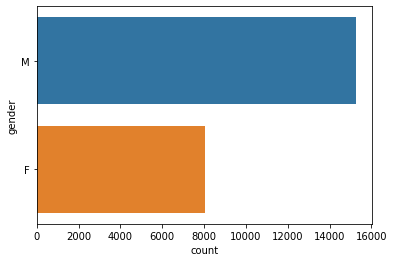

In [16]:
### target distribution
sns.countplot(data=df_work_on, y='gender')

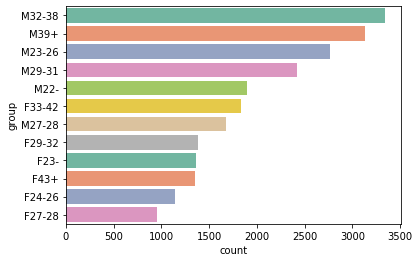

In [17]:
# I just hate this target (too many, no order)
order_tmp = df_original.group.value_counts().index
sns.countplot(data=df_original, y='group', palette='Set2', order=order_tmp)

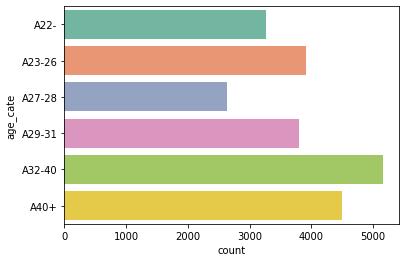

In [18]:
sns.countplot(data=df_original, y='age_cate', palette='Set2', 
             )

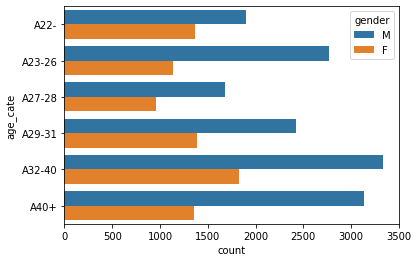

In [19]:
sns.countplot(data=df_original, y='age_cate', hue='gender', 
             )

In [20]:
# to do: create a percentage stacked bar plot for gender across age_cate
# nested target variables

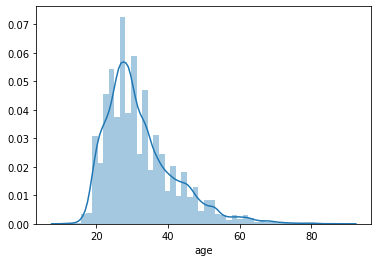

In [21]:
# last but not least, age target (regression task vs. classification task)
sns.distplot(df_original.age)

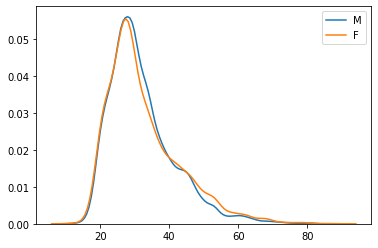

In [22]:
sns.kdeplot(df_original[df_original.gender=='M'].age, label='M')
sns.kdeplot(df_original[df_original.gender=='F'].age, label='F')

### next, gps against target

In [23]:
from mpl_toolkits.basemap import Basemap

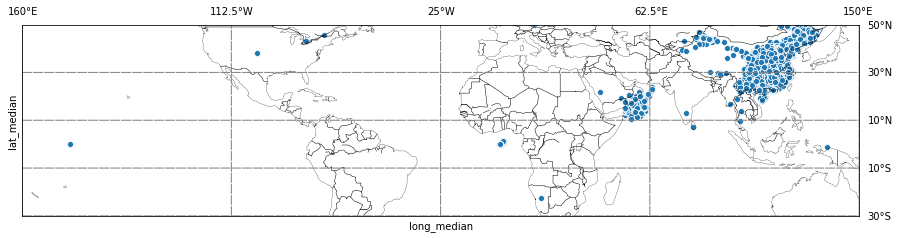

In [24]:
# don't be fooled by those gps at Africa, those are noises generated from zero gps
fig, ax = plt.subplots(1, 1, figsize=(15,15))

sns.scatterplot(data=df_original,
               x='long_median', y='lat_median',
               ax=ax)

# Initialize the map
map = Basemap(llcrnrlon=ax.get_xlim()[0]//10*10, urcrnrlon=ax.get_xlim()[1]//10*10,
              llcrnrlat=ax.get_ylim()[0]//10*10, urcrnrlat=ax.get_ylim()[1]//10*10, )
 
# Continent and countries!
# map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, ax=ax)

meridians = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5)
map.drawmeridians(meridians,
                  labels=[0,0,1,0], dashes=[10,1], color='gray'
                 )
parallels = np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],5)
map.drawparallels(parallels,
                  labels=[0,1,1,0], 
                  dashes=[10,1], color='gray'
                 )

ax.set_aspect(aspect='equal')


plt.show()

In [25]:
# fig, ax = plt.subplots(1, 1, figsize=(15,15))

# condition_tmp = (df_original.long_median>70) & (df_original.lat_median>15)
# sns.scatterplot(data=df_original[condition_tmp],
#                x='long_median', y='lat_median',
#                 hue='gender',
#                 s=10,
#                 edgecolor ='none',
#                ax=ax)

# # Initialize the map
# map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
#               llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )
 
# # Continent and countries!
# # map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# # map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
# map.drawcountries(color="black", linewidth=0.5, ax=ax)
# map.drawcoastlines(color="black", linewidth=0.25, ax=ax)

# meridians = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5)
# map.drawmeridians(meridians,
#                   labels=[0,0,1,0], dashes=[10,1], color='gray'
#                  )
# parallels = np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],5)
# map.drawparallels(parallels,
#                   labels=[0,1,1,0], 
#                   dashes=[10,1], color='gray'
#                  )

# ax.set_aspect(aspect='equal')


# plt.show()

In [26]:
# fig, ax = plt.subplots(1, 1, figsize=(15,15))

# condition_tmp = (df_original.long_median>70) & (df_original.lat_median>15)
# sns.scatterplot(data=df_original[condition_tmp],
#                x='long_median', y='lat_median',
#                 hue='age_cate',
#                 s=10,
#                 edgecolor ='none',
#                 palette='Set2',
#                 hue_order=df_original.age_cate.unique().sort_values(),
#                ax=ax)

# # Initialize the map
# map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
#               llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )
 
# # Continent and countries!
# # map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# # map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
# map.drawcountries(color="black", linewidth=0.5, ax=ax)
# map.drawcoastlines(color="black", linewidth=0.25, ax=ax)

# meridians = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5)
# map.drawmeridians(meridians,
#                   labels=[0,0,1,0], dashes=[10,1], color='gray'
#                  )
# parallels = np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],5)
# map.drawparallels(parallels,
#                   labels=[0,1,1,0], 
#                   dashes=[10,1], color='gray'
#                  )

# ax.set_aspect(aspect='equal')


# plt.show()

### next, event_count against target

In [27]:
# _, ax = plt.subplots(1,2)
# sns.boxplot(x=df_original.event_count, ax=ax[0])
# sns.boxplot(x=df_original.event_count, ax=ax[1], showfliers=False,)

In [28]:
# _, ax = plt.subplots(1,2)
# sns.boxplot(x=df_original.event_count, y=df_original.gender, ax=ax[0])
# sns.boxplot(x=df_original.event_count, y=df_original.gender, ax=ax[1], showfliers=False)

In [29]:
# sns.kdeplot(df_original[df_original.gender=='M'].event_count, label='M')
# sns.kdeplot(df_original[df_original.gender=='F'].event_count, label='F')

In [30]:
# _, ax = plt.subplots(1,2)
# sns.boxplot(x=df_original.event_count, y=df_original.age_cate, palette='Set2', ax=ax[0])
# sns.boxplot(x=df_original.event_count, y=df_original.age_cate, palette='Set2', ax=ax[1], showfliers=False)

In [31]:
# for i,age_grp in enumerate(df_original.age_cate.unique().sort_values()):
#     sns.kdeplot(df_original[df_original.age_cate==age_grp].event_count, label=age_grp, color=sns.color_palette('Set2')[i])

In [32]:
# to do: the distribution of this feature is very distorted, need some feature engineering.

### next, hour against target

In [33]:
# the df need some rearrangement for pd to handel, using melt
df_original[col_target+col_hour]

,gender,age,group,age_cate,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,M,36.0,M32-38,A32-40,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.076923,0.338462,0.000000,0.000000,0.000000,0.000000,0.061538,0.092308,0.000000,0.046154
1,F,31.0,F29-32,A29-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.027211,0.088435,0.013605,0.027211,0.020408,0.176871,0.000000,0.088435,0.020408
2,M,19.0,M22-,A22-,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.125000,0.000000,0.250000
3,M,40.0,M39+,A40+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.096154,0.000000,0.019231,0.019231,0.076923,0.038462,0.019231,0.038462,0.000000,0.000000
4,F,53.0,F43+,A40+,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23285,M,41.0,M39+,A40+,0.000000,0.000000,0.000000,0.000000,0.027523,0.018349,...,0.009174,0.082569,0.009174,0.027523,0.110092,0.091743,0.082569,0.036697,0.146789,0.027523
23286,F,49.0,F43+,A40+,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23287,M,35.0,M32-38,A32-40,0.001282,0.005128,0.010256,0.008974,0.007692,0.011538,...,0.038462,0.048718,0.037179,0.046154,0.058974,0.067949,0.062821,0.050000,0.060256,0.037179
23288,F,29.0,F29-32,A29-31,0.100000,0.033333,0.066667,0.066667,0.033333,0.033333,...,0.000000,0.066667,0.000000,0.000000,0.000000,0.100000,0.066667,0.066667,0.100000,0.066667


In [34]:
# df_melt_tmp = pd.melt(df_original[col_target+col_hour], id_vars=['gender'], value_vars=col_hour)
# # df_melt_tmp
# _, ax = plt.subplots(figsize=(8,2*5))
# sns.barplot(data=df_melt_tmp, x='value',  hue='gender', y='variable', ax=ax, ci=None)

In [35]:
# df_melt_tmp = pd.melt(df_original[col_target+col_hour], id_vars=['age_cate'], value_vars=col_hour)
# # df_melt_tmp
# _, ax = plt.subplots(figsize=(8,5*5))
# sns.barplot(data=df_melt_tmp, x='value',  hue='age_cate', y='variable', ax=ax, palette='Set2', ci=None)

### next, (app) label against target

In [36]:
# similarly, the df need some rearrangement for pd to handel, using melt
df_original[col_target+col_label[:20]]

,gender,age,group,age_cate,label__-1,label__128,label__130,label__152,label__168,label__179,...,label__262,label__263,label__302,label__303,label__306,label__405,label__548,label__549,label__564,label__704
0,M,36.0,M32-38,A32-40,0.028571,0.000000,0.000000,0.028571,0.000000,0.000000,...,0.028571,0.028571,0.028571,0.028571,0.000000,0.028571,0.028571,0.028571,0.000000,0.028571
1,F,31.0,F29-32,A29-31,0.028571,0.028571,0.000000,0.028571,0.028571,0.028571,...,0.028571,0.000000,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.000000,0.028571
2,M,19.0,M22-,A22-,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,...,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.090909,0.090909,0.000000,0.090909
3,M,40.0,M39+,A40+,0.023810,0.023810,0.000000,0.023810,0.000000,0.023810,...,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810
4,F,53.0,F43+,A40+,0.027778,0.027778,0.000000,0.000000,0.000000,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23285,M,41.0,M39+,A40+,0.025000,0.025000,0.000000,0.025000,0.000000,0.025000,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
23286,F,49.0,F43+,A40+,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,...,0.000000,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.000000,0.032258
23287,M,35.0,M32-38,A32-40,0.024390,0.024390,0.000000,0.000000,0.000000,0.024390,...,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390
23288,F,29.0,F29-32,A29-31,0.031250,0.031250,0.000000,0.031250,0.000000,0.031250,...,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.000000,0.031250


In [37]:
# df_melt_tmp.groupby('variable').mean().sort_values('value', ascending=False).index

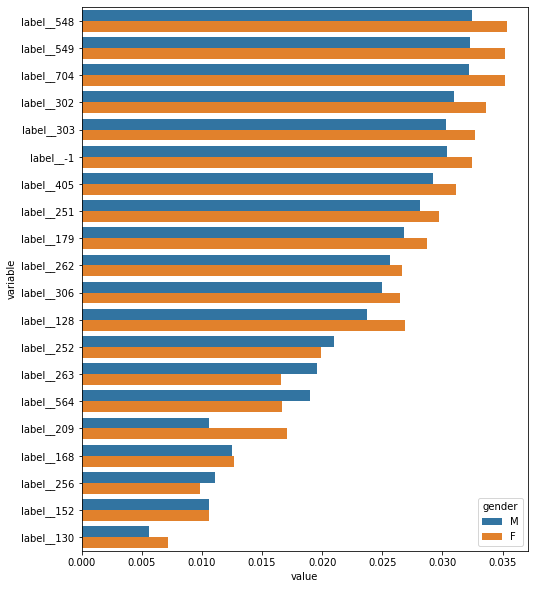

In [38]:
df_melt_tmp = pd.melt(df_original[col_target+col_label[:20]], id_vars=['gender'], value_vars=col_label[:20])
# df_melt_tmp
order_tmp = df_melt_tmp.groupby('variable').mean().sort_values('value', ascending=False).index
_, ax = plt.subplots(figsize=(8,2*5))
sns.barplot(data=df_melt_tmp, x='value',  hue='gender', y='variable', ax=ax, ci=None, order=order_tmp)

In [39]:
order_tmp = df_melt_tmp.groupby('variable').mean().sort_values('value', ascending=False).index.values
df_melt_tmp = pd.melt(df_original[col_target+col_label[:20]], id_vars=['gender'], value_vars=col_label[:20])
df_label_categories = pd.read_csv('./talkingdata-mobile-user-demographics/label_categories.csv')
# df_label_categories.head()

label_list_tmp = [int(label_id[7:]) for label_id in order_tmp]
# label_list_tmp

pd.merge(left=pd.DataFrame({'label_id': label_list_tmp}),
        right=df_label_categories,
         how='left',
        on='label_id').head()

,label_id,category
0,548,Industry tag
1,549,Property Industry 1.0
2,704,Property Industry 2.0
3,302,unknown
4,303,unknown


In [40]:
# df_melt_tmp = pd.melt(df_original[col_target+col_label[:20]], id_vars=['gender'], value_vars=col_label[:20])
# # df_melt_tmp
# order_tmp = df_melt_tmp.groupby('variable').mean().sort_values('value', ascending=False).index
# _, ax = plt.subplots(figsize=(8,2*5))
# sns.barplot(data=df_melt_tmp, x='value',  hue='gender', y='variable', ax=ax, ci=None, order=order_tmp)

# ax.set_yticklabels(pd.merge(left=pd.DataFrame({'label_id': label_list_tmp}),
#         right=df_label_categories,
#                             how='left',
#         on='label_id').category.values)
# plt.show()

In [41]:
# df_melt_tmp = pd.melt(df_original[col_target+col_label[:20]], id_vars=['age_cate'], value_vars=col_label[:20])
# # df_melt_tmp
# order_tmp = df_melt_tmp.groupby('variable').mean().sort_values('value', ascending=False).index
# _, ax = plt.subplots(figsize=(8,5*5))
# sns.barplot(data=df_melt_tmp, x='value',  hue='age_cate', y='variable', ax=ax, ci=None, order=order_tmp, palette='Set2')

# ax.set_yticklabels(pd.merge(left=pd.DataFrame({'label_id': label_list_tmp}),
#         right=df_label_categories,
#                             how='left',
#         on='label_id').category.values)
# plt.show()



### next,  app (id) against target

In [42]:
# similarly, the df need some rearrangement for pd to handel, using melt
df_original[col_target+col_app].head()

,gender,age,group,age_cate,app__-6590029937880196169,app__-5720078949152207372,app__-3955212733485100109,app__-2320783822570582843,app__-538061441862183033,app__33792862810792679,...,app__4244331088397413857,app__4348659952760821294,app__5729517255058371973,app__5927333115845830913,app__6284164581582112235,app__7348340405200054701,app__7460082553072507347,app__8693964245073640147,app__8948670408023620661,app__9112463114311278255
0,M,36.0,M32-38,A32-40,0.000000,0.166667,0.0,0.0,0.0,0.000000,...,0.000000,0.166667,0.000000,0.166667,0.0,0.000000,0.0,0.166667,0.0,0.000000
1,F,31.0,F29-32,A29-31,0.142857,0.142857,0.0,0.0,0.0,0.000000,...,0.000000,0.142857,0.000000,0.142857,0.0,0.000000,0.0,0.142857,0.0,0.000000
2,M,19.0,M22-,A22-,0.250000,0.250000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.250000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,M,40.0,M39+,A40+,0.083333,0.000000,0.0,0.0,0.0,0.083333,...,0.083333,0.083333,0.083333,0.083333,0.0,0.083333,0.0,0.083333,0.0,0.083333
4,F,53.0,F43+,A40+,0.000000,0.000000,0.0,0.0,0.2,0.000000,...,0.000000,0.200000,0.000000,0.000000,0.0,0.000000,0.0,0.200000,0.0,0.000000


In [43]:
# df_melt_tmp = pd.melt(df_original[col_target+col_app], id_vars=['gender'], value_vars=col_app)
# # df_melt_tmp
# order_tmp = df_melt_tmp.groupby('variable').mean().sort_values('value', ascending=False).index
# _, ax = plt.subplots(figsize=(8,2*5))
# sns.barplot(data=df_melt_tmp, x='value',  hue='gender', y='variable', ax=ax, ci=None, order=order_tmp)

# # ax.set_yticklabels(pd.merge(left=pd.DataFrame({'label_id': label_list_tmp}),
# #         right=df_label_categories,
# #                             how='left',
# #         on='label_id').category.values)
# plt.show()

In [44]:
# df_app_labels = pd.read_csv('./talkingdata-mobile-user-demographics/app_labels.csv')
# df_app_labels.head()

# app_list_tmp = [int(app_id[5:]) for app_id in order_tmp]
# # label_list_tmp

# df_link_tmp = pd.merge(left=pd.DataFrame({'app_id': app_list_tmp}),
#         right=df_app_labels,
#          how='left',
#         on='app_id')
# df_link_tmp = pd.merge(left=df_link_tmp,
#         right=df_label_categories,
#                             how='left',
#         on='label_id')
# # df_link_tmp.head()

# df_link_tmp.groupby('app_id', sort=False).category.unique().head()

In [45]:
# df_melt_tmp = pd.melt(df_original[col_target+col_app], id_vars=['gender'], value_vars=col_app)
# # df_melt_tmp
# order_tmp = df_melt_tmp.groupby('variable').mean().sort_values('value', ascending=False).index
# _, ax = plt.subplots(figsize=(8,2*8))
# sns.barplot(data=df_melt_tmp, x='value',  hue='gender', y='variable', ax=ax, ci=None, order=order_tmp)

# tick_tmp = [str(iterm) for iterm in df_link_tmp.groupby('app_id', sort=False).category.unique().values]
# ax.set_yticklabels(tick_tmp)
# plt.show()

In [46]:
# df_melt_tmp = pd.melt(df_original[col_target+col_app], id_vars=['age_cate'], value_vars=col_app)
# # df_melt_tmp
# order_tmp = df_melt_tmp.groupby('variable').mean().sort_values('value', ascending=False).index
# _, ax = plt.subplots(figsize=(8,5*5))
# sns.barplot(data=df_melt_tmp, x='value',  hue='age_cate', y='variable', ax=ax, ci=None, order=order_tmp, palette='Set2')

# tick_tmp = [str(iterm) for iterm in df_link_tmp.groupby('app_id', sort=False).category.unique().values]
# ax.set_yticklabels(tick_tmp)
# plt.show()

### Move on, (phone) brand against target

In [47]:
# similarly, the df need some rearrangement for pd to handel, using melt
df_original[col_target+col_brand].head()

,gender,age,group,age_cate,brand_A plus,brand_China Mobile,brand_Gionee,brand_HTC,brand_Huawei,brand_Kupai,...,brand_Qiku,brand_Samsung,brand_Sony,brand_TCL,brand_TV Plus,brand_Xiaomi,brand_ZTE,brand_hammer,brand_other,brand_vivo
0,M,36.0,M32-38,A32-40,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,31.0,F29-32,A29-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,M,19.0,M22-,A22-,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M,40.0,M39+,A40+,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,53.0,F43+,A40+,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


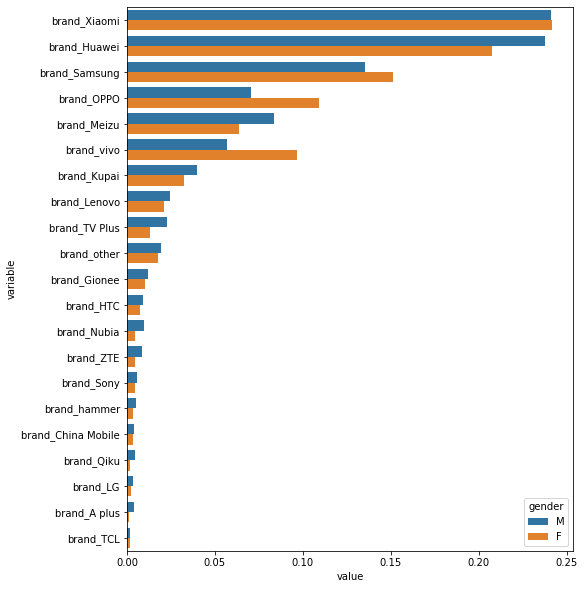

In [48]:
df_melt_tmp = pd.melt(df_original[col_target+col_brand], id_vars=['gender'], value_vars=col_brand)
# df_melt_tmp
order_tmp = df_melt_tmp.groupby('variable').mean().sort_values('value', ascending=False).index
_, ax = plt.subplots(figsize=(8,2*5))
sns.barplot(data=df_melt_tmp, x='value',  hue='gender', y='variable', ax=ax, ci=None, order=order_tmp)

plt.show()

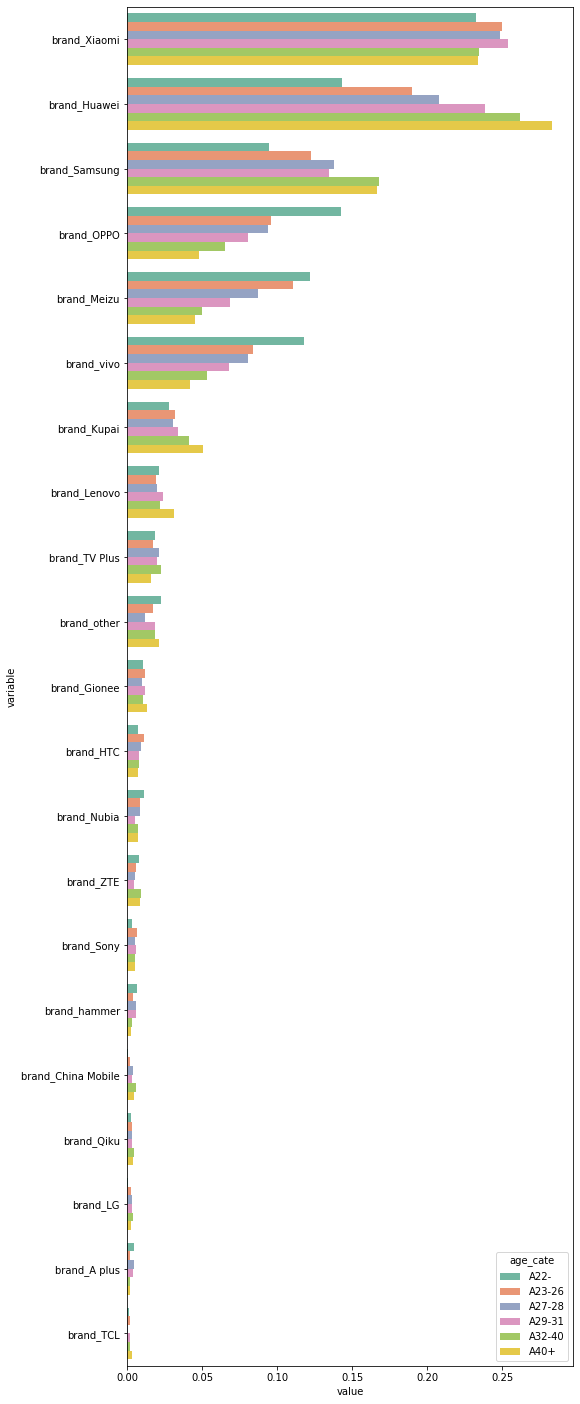

In [49]:
df_melt_tmp = pd.melt(df_original[col_target+col_brand], id_vars=['age_cate'], value_vars=col_brand)
# df_melt_tmp
order_tmp = df_melt_tmp.groupby('variable').mean().sort_values('value', ascending=False).index
_, ax = plt.subplots(figsize=(8,5*5))
sns.barplot(data=df_melt_tmp, x='value',  hue='age_cate', y='variable', ax=ax, ci=None, order=order_tmp, palette='Set2')

plt.show()

### Last but not least, (phone) model against target

In [50]:
# similarly, the df need some rearrangement for pd to handel, using melt
df_original[col_target+col_br_model[:20]].head()

,gender,age,group,age_cate,br_model_A plus-One,br_model_Gionee-F103,br_model_Huawei-3C glory,br_model_Huawei-4-head,br_model_Huawei-4A glory,br_model_Huawei-Ascend G7,...,br_model_Huawei-Enjoy 5S,br_model_Huawei-Glory 3X Play Edition,br_model_Huawei-Glory 6,br_model_Huawei-Glory 6 Plus,br_model_Huawei-Glory 6 plus,br_model_Huawei-Glory 7,br_model_Huawei-Glory 7i,br_model_Huawei-Glory Play 4,br_model_Huawei-Glory Play 4X,br_model_Huawei-Glory Play 5
0,M,36.0,M32-38,A32-40,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,31.0,F29-32,A29-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M,19.0,M22-,A22-,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M,40.0,M39+,A40+,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,53.0,F43+,A40+,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


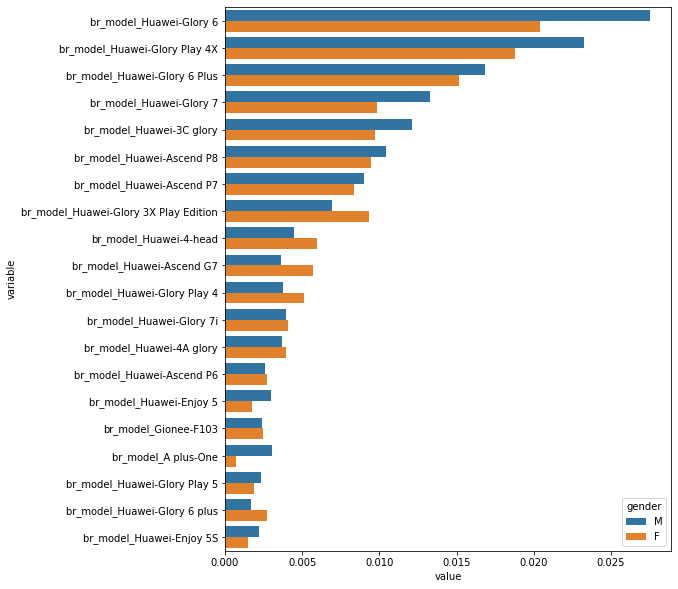

In [51]:
df_melt_tmp = pd.melt(df_original[col_target+col_br_model[:20]], id_vars=['gender'], value_vars=col_br_model[:20])
# df_melt_tmp
order_tmp = df_melt_tmp.groupby('variable').mean().sort_values('value', ascending=False).index
_, ax = plt.subplots(figsize=(8,2*5))
sns.barplot(data=df_melt_tmp, x='value',  hue='gender', y='variable', ax=ax, ci=None, order=order_tmp)

plt.show()

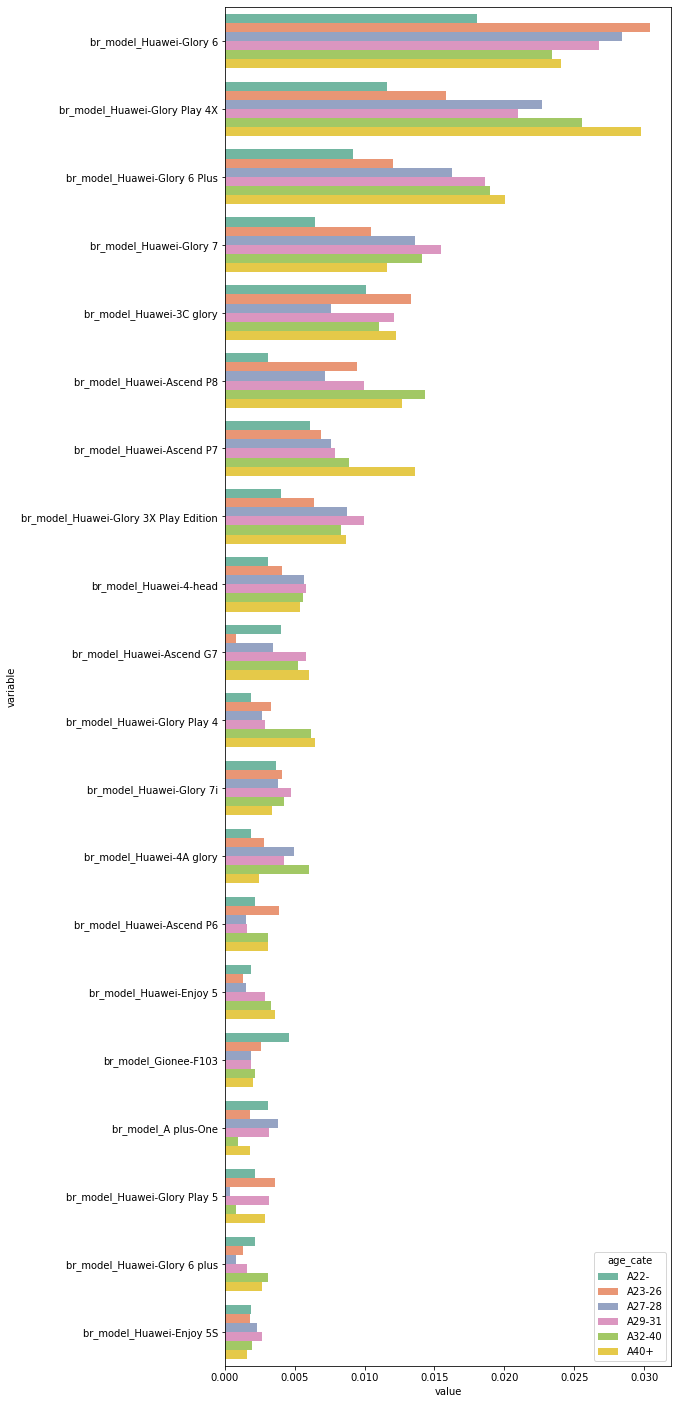

In [52]:
df_melt_tmp = pd.melt(df_original[col_target+col_br_model[:20]], id_vars=['age_cate'], value_vars=col_br_model[:20])
# df_melt_tmp
order_tmp = df_melt_tmp.groupby('variable').mean().sort_values('value', ascending=False).index
_, ax = plt.subplots(figsize=(8,5*5))
sns.barplot(data=df_melt_tmp, x='value',  hue='age_cate', y='variable', ax=ax, ci=None, order=order_tmp, palette='Set2')

plt.show()

# end of EDA
# to do:
as a data storytelling showstopper, we can wrap up with using gps, time_stamp across target

# done (0618)


# Modeling
- train-test split
- feature engineering (select K best, PCA)
- training (choose model, gridsearch CV)
- evaluation (classification report, ROC, precision-recall; regression)

In [53]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23290 entries, 0 to 23289
Columns: 235 entries, device_id to enc_by_device_4_label_id
dtypes: category(2), float64(229), int64(3), object(1)
memory usage: 41.4+ MB


# train-test split
- 23,562 rows
- use 6:2:2 split (train-validation-test)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# from sklearn.preprocessing import OneHotEncoder

# ohencoder = OneHotEncoder(sparse=False, dtype='int8')
# Y_is_male = ohencoder.fit_transform(Y[['gender']], )
# Y_is_male
# ohencoder.categories_
# ohencoder.get_feature_names()

In [56]:
Y = df_original[col_target].copy()

Y_dummy = pd.get_dummies(df_original[col_target])
Y_dummy.head()

,age,gender_M,gender_F,group_F23-,group_F24-26,group_F27-28,group_F29-32,group_F33-42,group_F43+,group_M22-,...,group_M27-28,group_M29-31,group_M32-38,group_M39+,age_cate_A22-,age_cate_A23-26,age_cate_A27-28,age_cate_A29-31,age_cate_A32-40,age_cate_A40+
0,36.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,31.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,19.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,40.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,53.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
X = df_original.drop(col_target, axis=1).copy()
X.drop('device_id', axis=1, inplace=True)
# X.head()

# building pipline start with 1 target: gender
y = Y_dummy[['gender_M']]
# Y.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=2/10, random_state=RANDOM_STATE)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=2/8, random_state=RANDOM_STATE)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/8, random_state=RANDOM_STATE)


In [58]:
print (len(X_train), len(Y_train), len(y_train))
print (len(X_val), len(Y_val), len(y_val))
print (len(X_test), len(Y_test), len(y_test))

len(X_train)+len(X_val)+len(X_test)

13974 13974 13974
4658 4658 4658
4658 4658 4658


23290

# Feature engineering
### Select K best

In [59]:
from sklearn.feature_selection import SelectKBest, chi2

In [60]:
kbest = SelectKBest()

In [61]:
kbest.fit(X_train, y_train)

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=10, score_func=<function f_classif at 0x0000018520AB2CA8>)

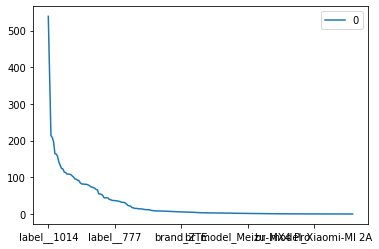

In [62]:
df_kbest = pd.DataFrame(kbest.scores_)
df_kbest.index = X_train.columns
df_kbest.sort_values(by=0, ascending=False).plot()

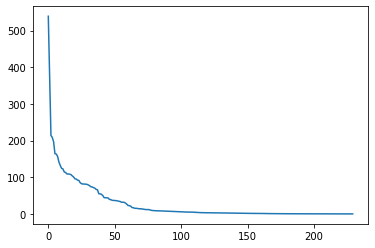

In [63]:
plt.plot(range(len(df_kbest.sort_values(by=0, ascending=False))), df_kbest.sort_values(by=0, ascending=False))

In [64]:
df_kbest.sort_values(by=0, ascending=False).reset_index().head(50)

,index,0
0,label__1014,539.168476
1,label__209,373.529239
2,label__757,214.024914
3,label__783,208.666123
4,label__779,196.663153
5,label__128,164.204892
6,label__263,163.455411
7,enc_by_device_4_app_id,156.761692
8,label__751,141.361770
9,label__778,132.275367


In [65]:
df_kbest.sort_values(by=0, ascending=False).index[:100]

Index(['label__1014', 'label__209', 'label__757', 'label__783', 'label__779',
       'label__128', 'label__263', 'enc_by_device_4_app_id', 'label__751',
       'label__778', 'app__628020936226491308', 'long_mean', 'long_median',
       'label__713', 'long_std', 'label__781', 'label__302', 'label__1015',
       'label__1007', 'label__704', 'label__775', 'label__405', 'label__303',
       'lat_std', 'lat_mean', 'enc_by_device_4_label_id', 'brand_vivo',
       'lat_median', 'label__710', 'label__795', 'label__548', 'label__549',
       'label__564', 'app__4244331088397413857', 'app__7460082553072507347',
       'label__251', 'label__714', 'brand_OPPO', 'app__3717049149426646122',
       'label__730', 'label__756', 'label__179', 'label__854', 'label__782',
       'label__256', 'label__130', 'label__774', 'label__787',
       'app__-6590029937880196169', 'label__1012', 'label__777', 'label__932',
       'label__794', 'label__306', 'app__-5720078949152207372', 'label__786',
       'label__90

In [66]:
for col in [col_gps, col_hour, col_event_count, col_label, col_app, col_brand, col_br_model]:
    print (str(col)[:5], ': ', len(np.intersect1d(df_kbest.sort_values(by=0, ascending=False).index[:100], col)))

['lat :  6
['hou :  6
['eve :  1
['lab :  46
['app :  10
['bra :  9
['br_ :  19


In [67]:
for col in [col_gps, col_hour, col_event_count, col_label, col_app, col_brand, col_br_model]:
    print (str(col)[:5], ': ', len(np.intersect1d(df_kbest.sort_values(by=0, ascending=False).index[:50], col)))

['lat :  6
['hou :  0
['eve :  0
['lab :  35
['app :  5
['bra :  2
['br_ :  0


## from selectKBest analysis, the most useful features to predict target is label, lat, while hour is supprisingly not very useful.
the rest are the assocated category to the top label_id with high prediction power

In [68]:
df_kbest[df_kbest.index.isin(col_label)].sort_values(by=0, ascending=False).reset_index().head(50)

,index,0
0,label__1014,539.168476
1,label__209,373.529239
2,label__757,214.024914
3,label__783,208.666123
4,label__779,196.663153
5,label__128,164.204892
6,label__263,163.455411
7,label__751,141.361770
8,label__778,132.275367
9,label__713,113.071124


In [69]:

df_label_categories = pd.read_csv('./talkingdata-mobile-user-demographics/label_categories.csv')
# df_label_categories.head()

label_list_tmp = [int(label[7:]) for label in df_kbest[df_kbest.index.isin(col_label)].sort_values(by=0, ascending=False).reset_index()['index'].values[:10]]
label_list_tmp
# label_list_tmp

pd.merge(left=pd.DataFrame({'label_id': label_list_tmp}),
        right=df_label_categories,
         how='left',
        on='label_id')

,label_id,category
0,1014,Consumer Finance
1,209,pictures photography
2,757,P2P
3,783,High risk
4,779,Higher income
5,128,online malls
6,263,Debit and credit
7,751,Bank financing
8,778,High profitability
9,713,Services 1


### some commnet
normally I don't rely on SelectKBest for feature selection. Because it didn't take into account the non linear relationship. For this reason, I will remain all the features as they are for now.
But after perform PCA, I realized PCA itself cannot effectively decrease dimension, so I will select the top 100.

In [70]:
# kbest.set_params(k=100)
X_train_best100 = X_train[df_kbest.sort_values(by=0, ascending=False).index[:100]].copy()
X_train_best100.head()

,label__1014,label__209,label__757,label__783,label__779,label__128,label__263,enc_by_device_4_app_id,label__751,label__778,...,br_model_Huawei-Glory 6,brand_Samsung,br_model_vivo-X3L,hour_22,label__719,br_model_Meizu-Charm blue metal,br_model_Lenovo-Gold fighter A8,br_model_TV Plus-Super phone 1s,br_model_Kupai-F2,br_model_Samsung-Galaxy S6 Edge
9676,0.000000,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,15,0.000000,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
17257,0.029412,0.000000,0.029412,0.029412,0.029412,0.029412,0.000000,43,0.000000,0.00000,...,0.0,0.0,0.0,0.074074,0.029412,0.0,0.0,0.0,0.0,0.0
8844,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,50,0.024390,0.02439,...,0.0,0.0,0.0,0.100000,0.024390,0.0,0.0,0.0,0.0,0.0
14529,0.026316,0.000000,0.026316,0.026316,0.026316,0.026316,0.026316,0,0.026316,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
22515,0.027027,0.000000,0.027027,0.027027,0.027027,0.027027,0.027027,44,0.000000,0.00000,...,0.0,0.0,0.0,0.037736,0.000000,0.0,0.0,0.0,0.0,0.0


In [71]:
X_train_best100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13974 entries, 9676 to 19366
Data columns (total 100 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   label__1014                      13974 non-null  float64
 1   label__209                       13974 non-null  float64
 2   label__757                       13974 non-null  float64
 3   label__783                       13974 non-null  float64
 4   label__779                       13974 non-null  float64
 5   label__128                       13974 non-null  float64
 6   label__263                       13974 non-null  float64
 7   enc_by_device_4_app_id           13974 non-null  int64  
 8   label__751                       13974 non-null  float64
 9   label__778                       13974 non-null  float64
 10  app__628020936226491308          13974 non-null  float64
 11  long_mean                        13974 non-null  float64
 12  long_median   

# PCA
PCA is my favorite feature engineering tool.
- correlation (heatmap)
- scaling
- pca 

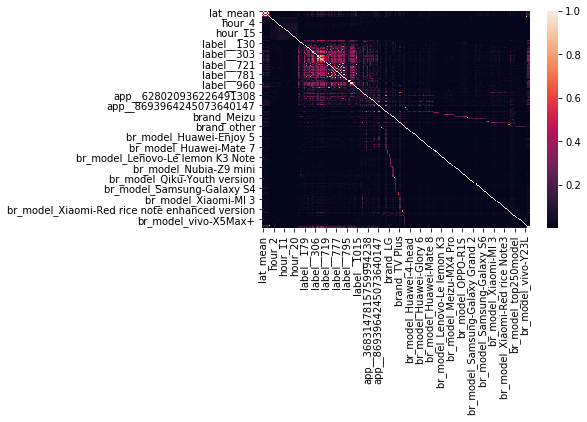

In [72]:
corr_mtrx = X_train.corr()
sns.heatmap(abs(corr_mtrx))

### the high-correlation issue is not servere. 

In [73]:
# scaling (I like to use PowerTransformer, StandardScaler, QuantileTransformer)
from sklearn.preprocessing import PowerTransformer, StandardScaler, QuantileTransformer

pwtransformer = PowerTransformer()
X_train_pwtrans = pwtransformer.fit_transform(X_train)


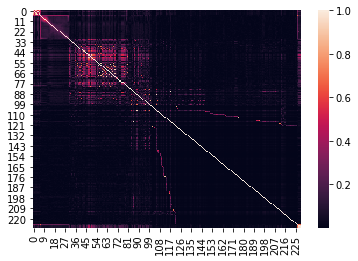

In [74]:
corr_mtrx = pd.DataFrame(X_train_pwtrans).corr()
sns.heatmap(abs(corr_mtrx))

In [75]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_pwtrans)

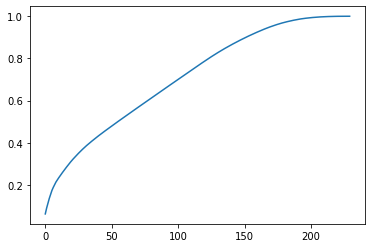

In [76]:
plt.plot(pca.explained_variance_ratio_.cumsum())

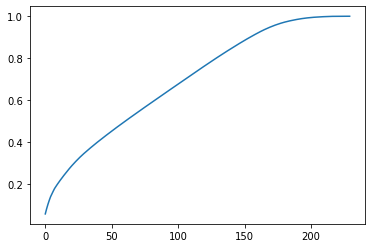

In [77]:
# standarscaler
sstransformer = StandardScaler()
X_train_sstrans = sstransformer.fit_transform(X_train)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_sstrans)

plt.plot(pca.explained_variance_ratio_.cumsum())

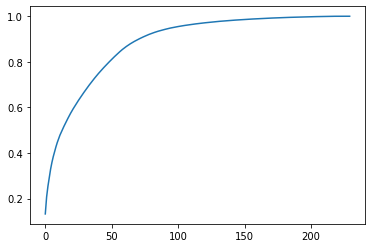

In [78]:
# quantile
qttransformer = QuantileTransformer()
X_train_qqtrans = qttransformer.fit_transform(X_train)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_qqtrans)

plt.plot(pca.explained_variance_ratio_.cumsum())

### some comments
it seems quantile transformer can best capture the explained variance

But what about after selectKBest

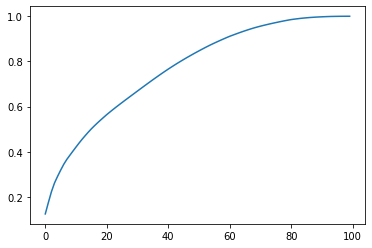

In [79]:
# X_train_best100
# power transformer
pwtransformer = PowerTransformer()
X_train_pwtrans = pwtransformer.fit_transform(X_train_best100)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_pwtrans)

plt.plot(pca.explained_variance_ratio_.cumsum())

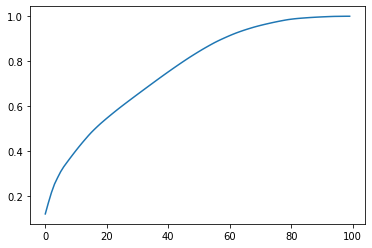

In [80]:
# X_train_best100
# standarscaler
sstransformer = StandardScaler()
X_train_sstrans = sstransformer.fit_transform(X_train_best100)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_sstrans)

plt.plot(pca.explained_variance_ratio_.cumsum())

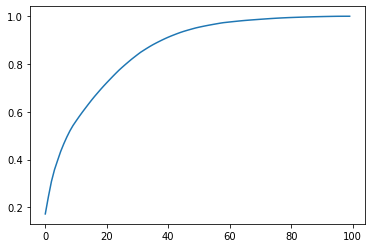

In [81]:
# X_train_best100
# standarscaler
qttransformer = QuantileTransformer()
X_train_qttrans = qttransformer.fit_transform(X_train_best100)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_qttrans)

plt.plot(pca.explained_variance_ratio_.cumsum())

### some comments
The quantile transformed data after pca is not bad. But in order to keep the dataset light weighted, I will 
- first select K=100 best features
- use quantile
- select top 60 principle components

here it comes (on validation data and test data)

In [82]:
# USE SELECTKBEST TOP 100
# X_train_best100 = X_train_best100
# # X_train_pca = X_train_pca

# qttransformer = QuantileTransformer(random_state=RANDOM_STATE)
# X_train_qttrans = qttransformer.fit_transform(X_train_best100)
# pca = PCA(n_components=60, random_state=RANDOM_STATE)
# X_train_pca = pca.fit_transform(X_train_qttrans)

# # val
# X_val_best100 = X_val[df_kbest.sort_values(by=0, ascending=False).index[:100]].copy()
# X_val_best100.head()

# X_val_qttrans = qttransformer.transform(X_val_best100)
# X_val_pca = pca.transform(X_val_qttrans)

# # test
# X_test_best100 = X_test[df_kbest.sort_values(by=0, ascending=False).index[:100]].copy()
# X_test_best100.head()

# X_test_qttrans = qttransformer.transform(X_test_best100)
# X_test_pca = pca.transform(X_test_qttrans)

In [83]:
# USE X_TRAIN
# X_train_pca = X_train_pca

qttransformer = QuantileTransformer(random_state=RANDOM_STATE)
X_train_qttrans = qttransformer.fit_transform(X_train)
pca = PCA(n_components=150, random_state=RANDOM_STATE)
X_train_pca = pca.fit_transform(X_train_qttrans)

# val
# X_val_best100 = X_val.copy()
# X_val_best100.head()

X_val_qttrans = qttransformer.transform(X_val)
X_val_pca = pca.transform(X_val_qttrans)

# # test
# X_test_best100 = X_test[df_kbest.sort_values(by=0, ascending=False).index[:100]].copy()
# X_test_best100.head()

X_test_qttrans = qttransformer.transform(X_test)
X_test_pca = pca.transform(X_test_qttrans)

In [120]:
### end of feature engineering

# Machine learning

# Choice of models

Let's try if machine learning algorithm can learn from the data. Here I choose 
- Logistic regression
- Random forest
- XGBoost
- LightGBM

Logistic regression is chosen as a base-line model. Random forest is chosen because it can mimic the many people voting situation. XGBoost and LightGBM are the stars in the supervised learning family and potentially perform well in many situations.

For this project I am not trying to demonstrate how to fine tune the machine learning models, so all the models will use their default hyper-parameter settings. Just you should know there is definetely better cross-validation schemes to help improve performance and justify evaluation.


In [121]:
from sklearn.metrics import f1_score, accuracy_score

### try logistic regression

In [122]:
# train with the default model
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(   
    max_iter=1e4,     
    random_state= RANDOM_STATE) 
lr1.fit(X=X_train_pca, y=y_train.gender_M.values)
lr1.get_params

print("f1-score on training set: {}".format(f1_score(y_true=y_train.gender_M.values, y_pred=lr1.predict(X_train_pca))))
print("f1-score on validation set: {}".format(f1_score(y_true=y_val.gender_M.values, y_pred=lr1.predict(X_val_pca))))

f1-score on training set: 0.7951248992747785
f1-score on validation set: 0.7991064780342517


In [123]:
# the result from the first trail is not that bad. 
# But considering that the accuracy is just a bit higher than the male percentage, it is nothing better than random guess.

In [124]:
print('male%:', y_train.gender_M.mean())
print("accuracy-score on training set: {}".format(accuracy_score(y_true=y_train.gender_M.values, y_pred=lr1.predict(X_train_pca))))
print("accuracy-score on validation set: {}".format(accuracy_score(y_true=y_val.gender_M.values, y_pred=lr1.predict(X_val_pca))))

male%: 0.6472019464720195
accuracy-score on training set: 0.7088879347359381
accuracy-score on validation set: 0.7103907256333191


# evaluation 

In [125]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

In [126]:
# Customer function # evaluation and visulization function
def model_evaluation(y_test, y_pred, y_pred_prob=None, is_print_classification_report=True):
    
# input:
# y_pred: dataframe, in [0,1]
# y_pred_prob: dataframe, between (0,1)
# y_test: dataframe, in [0,1]
# example: model_evaluation(y_test_1, df_dumb_model.churn_yes, df_dumb_model.churn_prob ):


    y_pred_tmp = y_pred
    y_pred_prob = y_pred_prob
    y_test_tmp = y_test
    is_print_classification_report = is_print_classification_report
    
        
# classification report
    if is_print_classification_report:
        print('classification_report')
        print(classification_report(y_test_tmp,y_pred_tmp, zero_division=0))

# plot ROC curve and precision-recall curve in one plot
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    # ROC plot
    
    fpr, tpr, threshold = roc_curve(y_test_tmp, y_pred_prob)
    threshold[0]=1
    roc_auc = auc(fpr, tpr)

    ax[0].scatter(fpr, tpr, c='r', s=2, )
    ax[0].fill_between(fpr, tpr, step='post', alpha=0.1, color='r')

#         plt.scatter(fpr, tpr, c=threshold, cmap='tab10', s=1, label = 'ROC_AUC = %0.2f' % roc_auc)
    ax[0].plot([0, 1], [1, 1],'k--')   
    ax[0].plot([0, 1], [0, 1],'k--')
#     ax[0].legend(loc = 'lower right',)
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_title('Receiver operating characteristic: ROC_AUC = %0.2f' % roc_auc)
    ax[0].set_ylabel('TPR')
    ax[0].set_xlabel('FPR')

    # precision-recall curve   


    precision, recall, thresholds2 = precision_recall_curve(y_test_tmp, y_pred_prob)
    thresholds2 = np.append(thresholds2,1)
    pr_auc = auc(recall,precision)
    average_precision = average_precision_score(y_test_tmp,y_pred_prob)
#     average_precision = average_precision_score(y_test_tmp, y_pred_prob)

# plt.scatter(precision, recall, 'g', label = 'AP = %0.2f' % average_precision)
    ax[1].scatter(recall, precision, c='k', s=1, )
    ax[1].fill_between(recall, precision, step='post', alpha=0.1, color='k')

#         plt.scatter(precision, recall, c=thresholds2, cmap='tab10', s=1, label = 'PR_AUC = %0.2f' % pr_auc)
 
    ax[1].set_title('Precision-Recall curve: average precision = %0.2f' % average_precision)
#     ax[1].legend(loc = 'upper right',)
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_ylabel('Precision')
    ax[1].set_xlabel('Recall')
    ax[1].grid()
    #     plt.colorbar()
    plt.tight_layout()
    plt.show()   

In [127]:
# customer func for evaluation and visualization

def plot_prediction_probability(y_test, y_pred, y_pred_prob=None):
    
    y_pred_tmp = y_pred
    y_pred_prob = y_pred_prob
    y_test_tmp = y_test   
    
    
    #     fig, ax = plt.subplots(1,2, figsize=(12,6))
    # Plot of Prediction Probabilities and the True Label
    df_scatterData = pd.DataFrame({'trueLabel':np.array(y_test).ravel(), 'proba': y_pred_prob})
    scatterDataMelted = pd.melt(df_scatterData, "trueLabel", \
                                var_name="proba")
    fig, ax = plt.subplots(2,1,figsize=(12,5), gridspec_kw={'height_ratios': [2,2]})
    sns.stripplot(x="value", y="proba", ax=ax[0],
                       hue='trueLabel', jitter=0.4, alpha=0.4,\
                  palette='Set2',
                       data=scatterDataMelted)
    ax[0].set_xlim([0,1])
    
    #     ax[0].set_xlabel(ax.get_xlabel(), fontsize=20)
    ax[0].set_xlabel("")
    ax[0].xaxis.set_tick_params(bottom=False, labelbottom=False,)
    #     ax[0].spines['bottom'].set_color('none')
    #
    ax[0].set_ylabel("")
    ax[0].yaxis.set_tick_params(left=False, labelleft=False,)
    ax[0]. legend(loc='upper right', frameon=True)
    ax[0].grid(axis='x')
    ax[0].set_title('Plot of prediction probabilities with true Labels', loc='left', fontsize=20,)
    
    
    #     sns.kdeplot(y_prob_model, ax=ax[1], shade=True, color='grey',
    #                 alpha=0.3, 
    #                 label='All prediction probability', 
    # #                 kwargs=dict(linewidth=1)
    # #                  plot_kws=dict(lw=1)                            
    #             )

#     sns.kdeplot(data=y_pred_prob[y_test_tmp.is_off_time==0], 
#                 ax=ax[1], shade=True, color=sns.color_palette("Set2")[0],
#     #                 alpha=0.2,
#                label='Prediction with actual label=0')
#     sns.kdeplot(y_pred_prob[y_test_tmp.is_off_time==1], ax=ax[1], shade=True, color=sns.color_palette("Set2")[1],
#     #                 alpha=0.2,
#                label='Prediction with actual label=1',)
    sns.kdeplot(y_pred_prob, ax=ax[1], shade=True, color=sns.color_palette("Paired")[0],
    #                 alpha=0.2,
               label='prediction probability',)
    #     ax[1].add_legend()
   
    ax[1].set_ylabel("")
    ax[1].yaxis.set_tick_params(left=False, labelleft=False,)
    ax[1].set_xlim([0,1])
    ax[1].set_xlabel("")
#     ax[1].xaxis.set_tick_params(bottom=False, labelbottom=False,)
    ax[1].grid(axis='x')
    ax[1].legend(loc='upper right', frameon=True)
    ax[1].set_xlabel('Predicted probability', fontsize=15)

    ax[1].yaxis.set_tick_params(labelsize=12)
        
    plt.show()

In [128]:
# customer functioin plot precision

def plot_probability_calibration(y_test, y_pred, y_pred_prob=None):
    
    y_pred_tmp = y_pred
    y_pred_prob = y_pred_prob
    y_test_tmp = y_test   
    
    fig, ax = plt.subplots(figsize=(12,3))
    
    precision_,_,thres_ =  precision_recall_curve(y_true=y_test_tmp, probas_pred=y_pred_prob)
    
    
#     ax=axes[0]
#     sns.lineplot(np.concatenate(([0],thres_,[1]))[::-1], np.concatenate((precision_,[1])), ax=ax,
#                  color=sns.color_palette("Set2")[0], label='precision on label=0',)
    sns.lineplot(thres_[::-1], precision_[1:], ax=ax,
                 color=sns.color_palette("Set2")[0], label='precision on label=0',)
    sns.lineplot(thres_, precision_[1:], ax=ax,
                 color=sns.color_palette("Set2")[1], label='precision on label=1')
    ax.fill_between(thres_[::-1], precision_[1:],
                    where=(thres_[::-1]<=0.5),
                    step='post', alpha=0.1, color=sns.color_palette("Set2")[0])
#     ax.fill_between(np.concatenate(([0],thres_))[::-1], precision_,
#                     where=((np.concatenate(([0],thres_))[::-1]<=0.5)  & ((np.concatenate(([0],thres_))<np.max(y_pred_prob)))),
#                     step='post', alpha=0.1, color=sns.color_palette("Set2")[0])
    ax.fill_between(thres_, precision_[1:], 
                       where=(thres_>=0.5) ,
                       step='post', alpha=0.1, color=sns.color_palette("Set2")[1])

    sns.lineplot([0, 1], [0.95, 0.95], linestyle=':', ax=ax, lw=1, label='0.95', color='grey')
    sns.lineplot([0, 1], [0.975, 0.975], linestyle=':', ax=ax, lw=1, label='0.975', color='grey')
    ax.lines[2].set_linestyle("--")
    ax.lines[3].set_linestyle("--")
    
    ax.yaxis.set_tick_params(right=True, labelright=True,
                            left=False, labelleft=False,)        
    ax.legend(loc='lower right', frameon=True)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1.05])
    ax.grid(axis='x')
    ax.set_xlabel('Predicted probability', fontsize=15)
    ax.yaxis.set_tick_params(labelsize=12)
    plt.show()



In [129]:
# Customer func for precision analysis

def precisionAnalysis(true_label, proba, recall_at):
    df = pd.DataFrame({'trueLabel':np.array(true_label).ravel(), 'proba': proba})
    df.sort_values(by='proba', ascending=False, inplace=True)
    threshold_value = recall_at*df.trueLabel.sum()
    i = 0
    j = 0
    while i < threshold_value+1:
        if df.iloc[j]["trueLabel"]==1:
            i += 1
        j += 1
    precision = i/j
    return precision# Evaluation <a id='evaluation'></a> 

In [130]:
# evaluation on logistic regression

classification_report
              precision    recall  f1-score   support

           0       0.60      0.40      0.48      1563
           1       0.74      0.87      0.80      3095

    accuracy                           0.71      4658
   macro avg       0.67      0.63      0.64      4658
weighted avg       0.69      0.71      0.69      4658



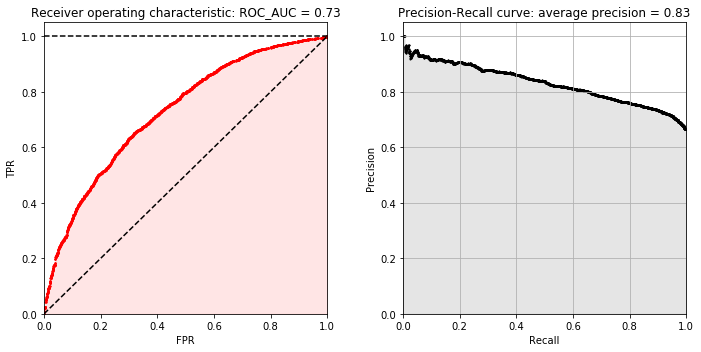

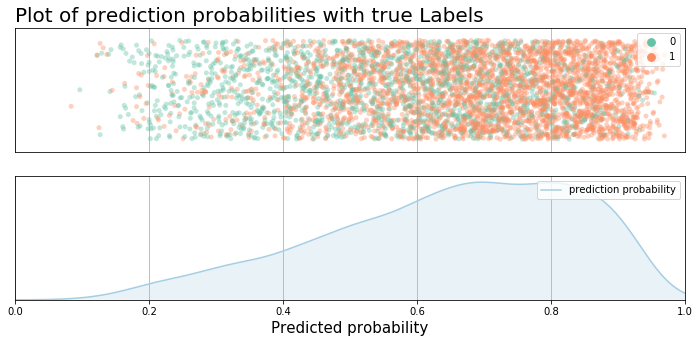

When recall is 75%, Precison is:  0.7712483399734396


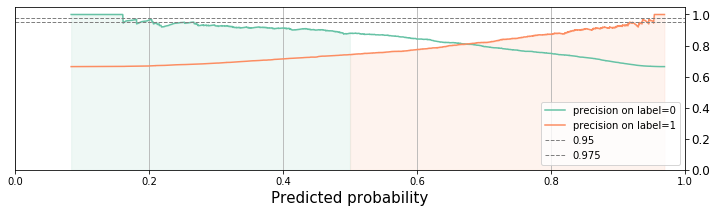

In [131]:
# evaluation metrics and visualization
X_test_1 = X_val_pca
y_test_1 = y_val.gender_M.values

y_pred_model = lr1.predict(X_test_1)
y_prob_model = lr1.predict_proba(X_test_1)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)
plot_probability_calibration(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

### Explain on the result
The evaluation metrics can be read directely from the classificaiton report, including accuracy, precision, recall and f1 score on both 0 and 1 class.
- The ROC curve is displayed. For ROC curve we usually care about the area under curve (AUC). Note that there is an diagonal line. I am afraid I cannot go to the details about ROC. Just remember, we desire an ROC curve above the diagonal line as much as possible which will gives us an maximum AUC ROC value of 1, while the diagonal line is associated with AUC ROC = 0.5.
- Precision-recall curve is also ploted. For this curve, we normally care about average precision and the precision at certain recall level, i.e. at 75% reacall.  

The performance of logistic regression model is not very good in this case. We were already expecting this since the data is not linearly seperatable.
- Among the accuracy is around 0.55, recall=0.60, and precision=0.57. Note that such metrics are calculated assuming the threshold is 0.5. note*
- ROC AUC is a 0.57, which we can see from the plot that ROC curve is just above the diagonal line. 
- The average precision is 0.57, and it is pretty flat across all the recall value, (most of the case, precision would drop when recall increase), with precision=0.56 when recall is 75%.

Next, I would like to introduce to you the predication probability strip plot. I found it very intuitive to show the distribution of predicted probablity with repective to the true label. This plot should be consistent with the conclusion drawn from ROC curve and precision-recall curve, but it also tells a story in more details about the predicted probability distribution, which can be helpful for making decision in proability calibration. i.e. we an pick up predictions that when we are very sure according to its prediction proability. I will explain this concept on the following machine learning models and the idea should be immediately clearer to you.

note*: some metrics might change due to I choose different sample size, but they should not be dramatically different. 

In [132]:
X_train_1 = X_train_pca
y_train_1 = y_train.gender_M.values

X_test_1 = X_val_pca
y_test_1 = y_val.gender_M.values



### try SVM

In [133]:
from sklearn.svm import SVC

svc1 = SVC(random_state= RANDOM_STATE)
svc1.fit(X=X_train_1, y=y_train_1)
y_pred_model = svc1.predict(X_test_1)
# y_prob_model = svc1.predict_proba(X_test_1)[:,1]

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=svc1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=svc1.predict(X_test_1))))

f1-score on training set: 0.8675963412805517
f1-score on test set: 0.8078989400319442


### try KNN

In [134]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier()
knn1.fit(X=X_train_1, y=y_train_1)
y_pred_model = knn1.predict(X_test_1)
y_prob_model = knn1.predict_proba(X_test_1)[:,1]

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=knn1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=knn1.predict(X_test_1))))

f1-score on training set: 0.8200031385677669
f1-score on test set: 0.7390769230769232


### try naive bayes

In [135]:
from sklearn.naive_bayes import GaussianNB

gnb1 = GaussianNB()
gnb1.fit(X=X_train_1, y=y_train_1)
y_pred_model = gnb1.predict(X_test_1)
y_prob_model = gnb1.predict_proba(X_test_1)[:,1]

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=gnb1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=gnb1.predict(X_test_1))))

f1-score on training set: 0.6360739324410453
f1-score on test set: 0.623749292052105


### try random forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(random_state= RANDOM_STATE)
rfc1.fit(X=X_train_1, y=y_train_1)
y_pred_model = rfc1.predict(X_test_1)
y_prob_model = rfc1.predict_proba(X_test_1)[:,1]

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=rfc1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=rfc1.predict(X_test_1))))

f1-score on training set: 1.0
f1-score on test set: 0.8040010813733441


classification_report
              precision    recall  f1-score   support

           0       0.66      0.15      0.24      1563
           1       0.69      0.96      0.80      3095

    accuracy                           0.69      4658
   macro avg       0.68      0.56      0.52      4658
weighted avg       0.68      0.69      0.62      4658



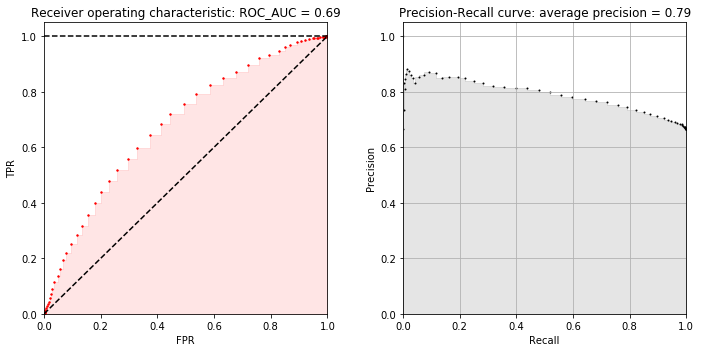

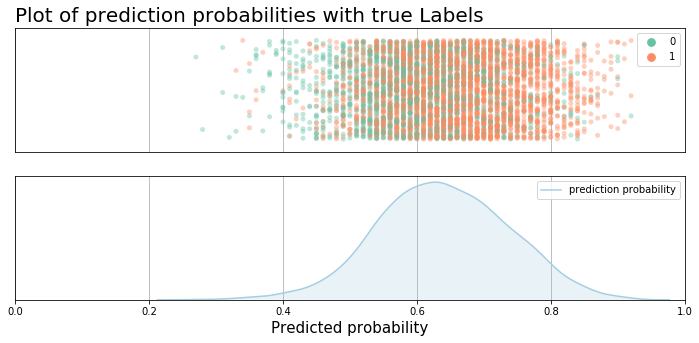

When recall is 75%, Precison is:  0.753731343283582


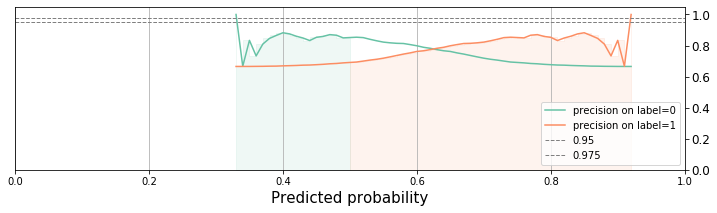

In [137]:
# evaluation metrics and visualization

y_pred_model = rfc1.predict(X_test_1)
y_prob_model = rfc1.predict_proba(X_test_1)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)
plot_probability_calibration(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

### evaluation on random forest
The performance has improved a lot, 
- accuracy, precision, f1 score are over 0.90, with recall a short of 0.89. Again, all these are associated with proability threshold==0.5.
- the AUC ROC and average precision is close to a full score. with AUC of ROC =0.97, average precision = 0.98.

Let's put our atttention to prediction proability stip plot. This time the predicted probability distribution is seperated on two side. With the actual labels color code with green=0, orange=1, you should realize that when an orage lable comes to the left side it indicates the model made a wrong prediction. (Here assuming the arbitrary threshold is set to 0.5).

Next, a good nature of many machine learning models is when it has a prediction value close to 1 or 0, pretty good chance that this prediction is correct. This phenomenon can be easily spot in the precision-probability plot (the last plot). i.e. when the predicted probability is over 0.8, the precion on label=1 is over 0.975, and when the predicted probability is less than 0.2, the precision on label=0 is also over 0.975. Actually it is very straightforward to see that as the predicted probability increase, the precision on label=1 also increase, on the other hand, when the predicted probability decrease, the precision on label=1 also increase. (Hopefully you see what I am doing now).

What I describe is the idea of probability calibration. Namely, we can cast away those predictions with value around 0.5, which can help to improve precision (at the cost of decrease of recall of course.). 

Note that if we throw away those prediction is within (0.2-0.8), the precision on both label=0 and lable=1 are above 0.975. Then how much element we have lost? We will lost 20% of the prediction. Since the logistic regression is too bad, for now just remember this number and we will compare the rest of the models.

notes* I drop the color to represent a more realistic condition, that is when you look at the predicted probaility distribution, there is no color to tell you the actual label. But this should not 

### try XGBoost

In [138]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(random_state=RANDOM_STATE)
xgbc.fit(X=X_train_1, y=y_train_1)
xgbc.get_params

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=xgbc.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=xgbc.predict(X_test_1))))

f1-score on training set: 0.9919190808641636
f1-score on test set: 0.7792050778298323


classification_report
              precision    recall  f1-score   support

           0       0.54      0.40      0.46      1563
           1       0.73      0.83      0.78      3095

    accuracy                           0.69      4658
   macro avg       0.64      0.61      0.62      4658
weighted avg       0.67      0.69      0.67      4658



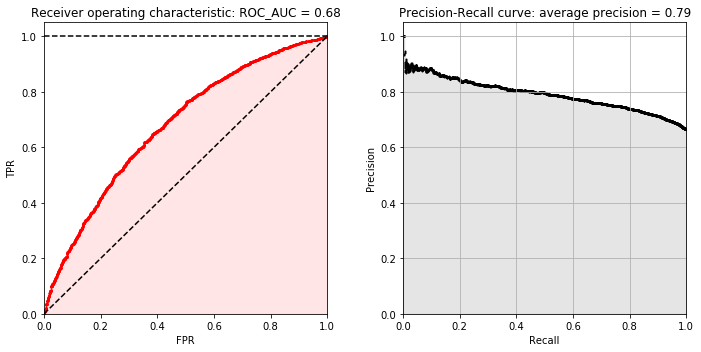

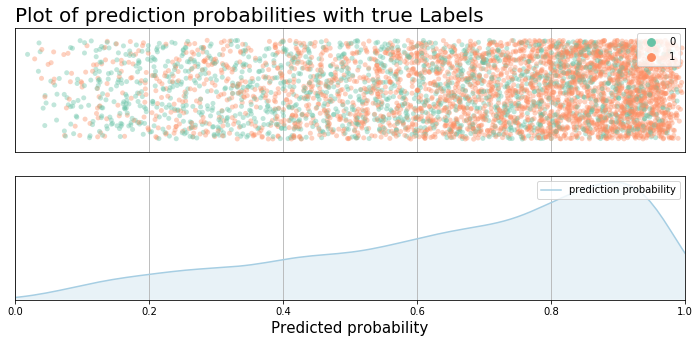

When recall is 75%, Precison is:  0.7505654281098546


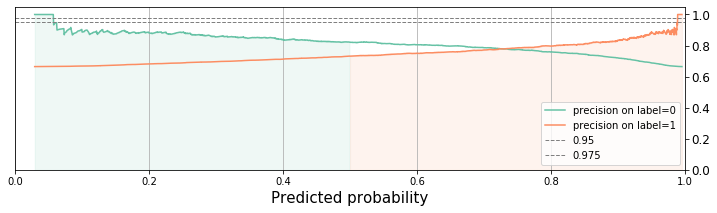

In [139]:
# evaluation metrics and visualization
y_pred_model = xgbc.predict(X_test_1)
y_prob_model = xgbc.predict_proba(X_test_1)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)
plot_probability_calibration(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

sumary of XGBoost
I will save some words here but just talk about one thing. Remember the 20% prediction random forest cast away. What about XGBoost? This number is down to 13%. Wow, great improve.

From the classification report you can see that, even the metrics didn't seem better than the one of random forest. But when look into the predicted probability, we would realize the result from XGBoost is actually even better.

Let's move on to take a look at the last candidate. (Let me know if proability calibration doesn't make much sense to you)

# try lightGBM

In [140]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=RANDOM_STATE)
lgbm.fit(X=X_train_1, y=y_train_1)
lgbm.get_params

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=lgbm.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=lgbm.predict(X_test_1))))

f1-score on training set: 0.9159061613817994
f1-score on test set: 0.8038557032276911


classification_report
              precision    recall  f1-score   support

           0       0.62      0.36      0.46      1563
           1       0.73      0.89      0.80      3095

    accuracy                           0.71      4658
   macro avg       0.68      0.62      0.63      4658
weighted avg       0.70      0.71      0.69      4658



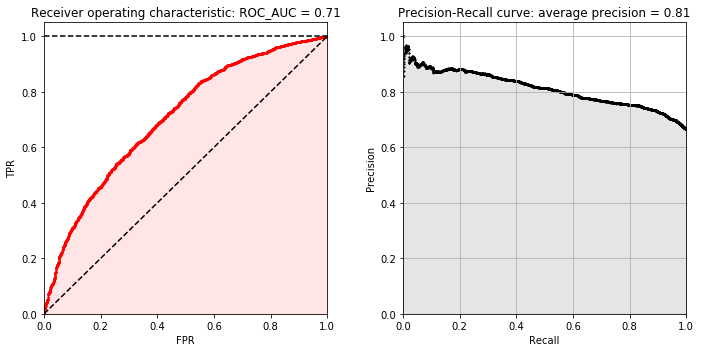

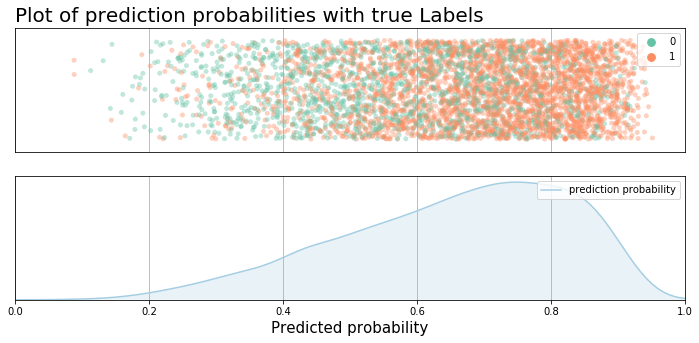

When recall is 75%, Precison is:  0.7586544741998694


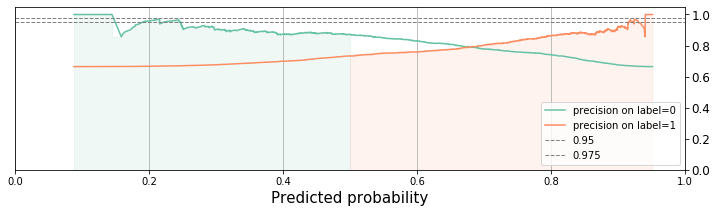

In [141]:
# evaluation metrics and visualization
y_pred_model = lgbm.predict(X_test_1)
y_prob_model = lgbm.predict_proba(X_test_1)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)
plot_probability_calibration(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

In [142]:
# try to use the original data (no pca)

In [143]:
# from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=RANDOM_STATE)
lgbm.fit(X=X_train, y=y_train_1)
lgbm.get_params

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=lgbm.predict(X_train))))
print("f1-score on validation set: {}".format(f1_score(y_true=y_test_1, y_pred=lgbm.predict(X_test))))

f1-score on training set: 0.8766052484645448
f1-score on validation set: 0.7202018702686657


# Some comments
this is a quick scan of the popular models. The goal is to find out the models that has the most potential so that we can further fine tune the parameters. From the test, we found that
- the models have best performancfes are SVM (supprisingly), randomForest, Xgboost, LightGBM
- data with pca is better than not

Note that even SVM has the best performance on validation set, the model itself has some drawbacks not suitable for application. (e.g. the computation speed is slow. e.g. SVM doesn't provide predictation probability, we cannot conduct probablity calibration.) So we would not choose it for further parameter fine-tuning.

# Fine tune the parameters

In [144]:
# Gridsearch CV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate':[  0.05, 0.1],
    'n_estimators':[50, 100, 150],
    'max_depth' : [3, None],
    'min_samples_leaf': [ 8 ],
    'min_samples_split':[ 8 ],
    'max_features':[0.8, 0.9],
#     'max_depth': [ 3,  8, 12, ],
#     'min_samples_leaf': [ 4, 8, 16, ],
#     'min_samples_split':[ 2, 4, 8,],
#     'max_features':['auto', 0.9],
#     'tol': [1e-8, 1e-6,]
    
        
}
cv_num = 5
# Create a based model
xbg_grid = XGBClassifier()
# Instantiate the grid search model
grid_search_gbm2 = GridSearchCV(estimator = xbg_grid, param_grid = param_grid, 
                          cv = cv_num, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1, )


# Fit the random search model
_ = grid_search_gbm2.fit(X_train_1, y_train_1)
print(grid_search_gbm2.best_score_)
print(grid_search_gbm2.best_estimator_.get_params)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 20.5min finished


0.7946722708704484
<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              max_features=0.8, min_child_weight=1, min_samples_leaf=8,
              min_samples_split=8, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)>


In [145]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_gbm2.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_gbm2.predict(X_test_1))))

f1-score on training set: 0.8072072072072072
f1-score on test set: 0.8080229226361032


In [146]:
# there is 0.03 improve, this should be exciting

classification_report
              precision    recall  f1-score   support

           0       0.68      0.19      0.29      1563
           1       0.70      0.96      0.81      3095

    accuracy                           0.70      4658
   macro avg       0.69      0.57      0.55      4658
weighted avg       0.69      0.70      0.63      4658



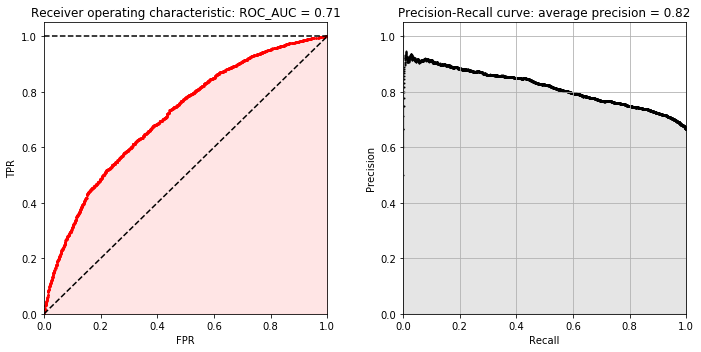

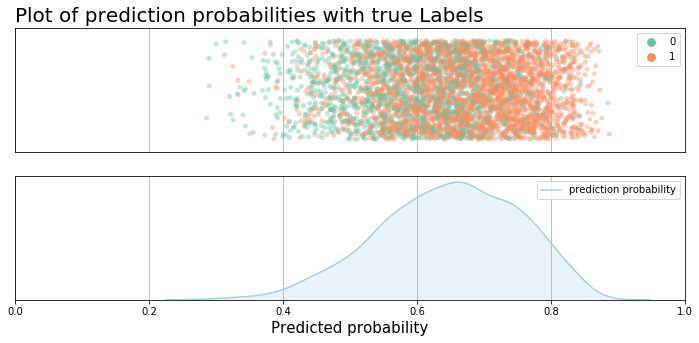

When recall is 75%, Precison is:  0.7598953222113183


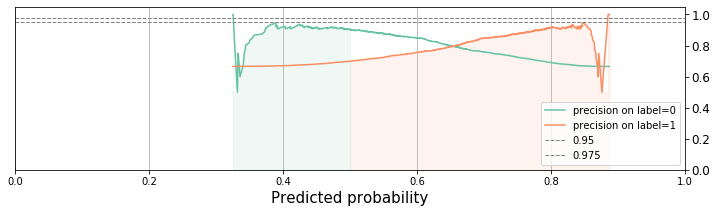

In [147]:
# evaluation metrics and visualization
y_pred_model = grid_search_gbm2.best_estimator_.predict(X_test_1)
y_prob_model = grid_search_gbm2.best_estimator_.predict_proba(X_test_1)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)
plot_probability_calibration(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

In [148]:
# stop here

SyntaxError: invalid syntax (<ipython-input-148-a96ba3aab008>, line 1)

In [ ]:
# fine tune lightGBM, CHECK lightGBM's parameter name first

In [150]:
from sklearn.model_selection import RandomizedSearchCV

In [151]:
# Gridsearch CV
# from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate':[  0.05, 0.1],
    'n_estimators':[50, 100,],
    'max_depth' : [3, 10, 20, 40],
#     'min_samples_leaf': [ 8, 16,  ],
    'min_samples_split':[ 8 ],
    'max_features':[0.8, 0.9],
#     'max_depth': [ 3,  8, 12, ],
#     'min_samples_leaf': [ 4, 8, 16, ],
#     'min_samples_split':[ 2, 4, 8,],
#     'max_features':['auto', 0.9],
#     'tol': [1e-8, 1e-6,]
    
        
}
cv_num = 5
# Create a based model
lgbm_grid = LGBMClassifier(is_unbalance=True)
# Instantiate the grid search model
grid_search_lgbm = RandomizedSearchCV(estimator = lgbm_grid, param_distributions = param_grid, n_iter=30,
                          cv = cv_num, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1, )


# Fit the random search model
_ = grid_search_lgbm.fit(X_train_1, y_train_1)
print(grid_search_lgbm.best_score_)
print(grid_search_lgbm.best_estimator_.get_params)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.9min finished


0.7384341096122986
<bound method LGBMModel.get_params of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', is_unbalance=True, learning_rate=0.1,
               max_depth=10, max_features=0.9, min_child_samples=20,
               min_child_weight=0.001, min_samples_split=8, min_split_gain=0.0,
               n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>


In [152]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_lgbm.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_lgbm.predict(X_test_1))))

f1-score on training set: 0.9546533981680425
f1-score on test set: 0.7474780883082521


classification_report
              precision    recall  f1-score   support

           0       0.51      0.56      0.53      1563
           1       0.77      0.73      0.75      3095

    accuracy                           0.67      4658
   macro avg       0.64      0.64      0.64      4658
weighted avg       0.68      0.67      0.68      4658



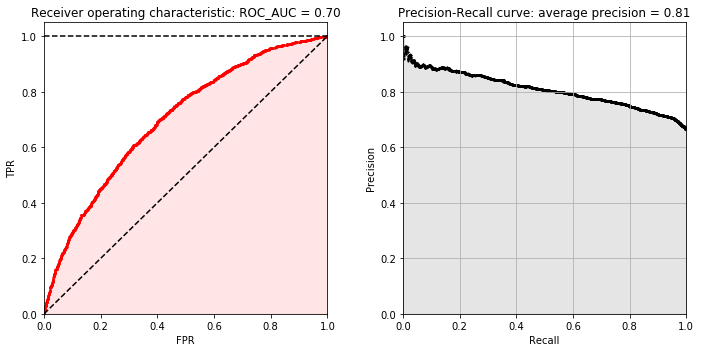

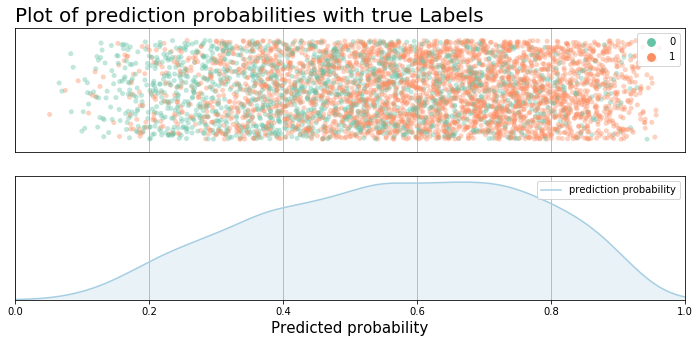

When recall is 75%, Precison is:  0.7616393442622951


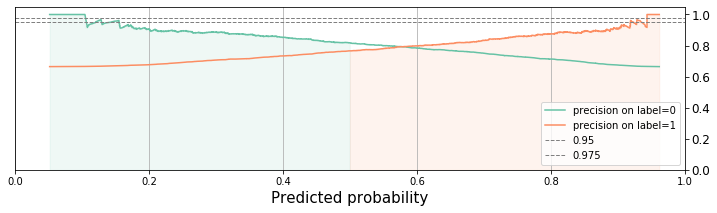

In [153]:
# evaluation metrics and visualization
y_pred_model = grid_search_lgbm.best_estimator_.predict(X_test_1)
y_prob_model = grid_search_lgbm.best_estimator_.predict_proba(X_test_1)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)
plot_probability_calibration(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

In [154]:
# stop

NameError: name 'stop' is not defined

# Some comments
parameter fine-tuning helped to increase f1 score by 0.03 for xgboost and 0.002 for lightgbm, respectively. 
- I will take into account the metrics and the computation time when using fine-tuning. 
- Personally, I am on the side of probability calibration, especially if it is two-class classsification.

# try neural network
- personally, I don't think the data is enough for deep learning. 
- but as part of the experiment, let's see how it would go.

In [155]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,2,))
mlp.fit(X_train_1, y_train_1)

# lgbm.fit(X_train_1, y_train_1)
# print(lgbm.best_score_)
# print(grid_search_gbm5.best_estimator_.get_params)

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=mlp.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=mlp.predict(X_test_1))))

f1-score on training set: 0.8792106158557332
f1-score on test set: 0.7934798428176394


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50,2,))
mlp.fit(X_train_1, y_train_1)

# lgbm.fit(X_train_1, y_train_1)
# print(lgbm.best_score_)
# print(grid_search_gbm5.best_estimator_.get_params)

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=mlp.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=mlp.predict(X_test_1))))

classification_report
              precision    recall  f1-score   support

           0       0.51      0.56      0.53      1563
           1       0.77      0.73      0.75      3095

    accuracy                           0.67      4658
   macro avg       0.64      0.64      0.64      4658
weighted avg       0.68      0.67      0.68      4658



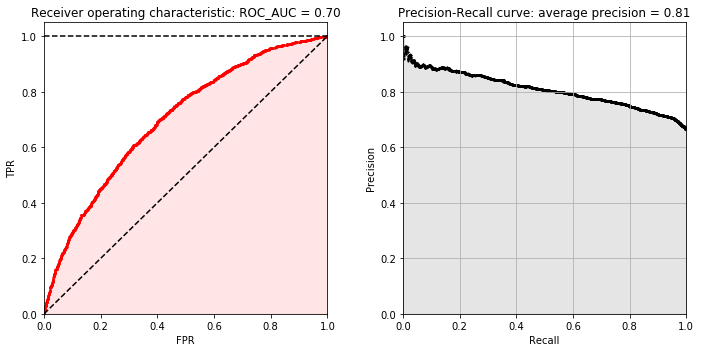

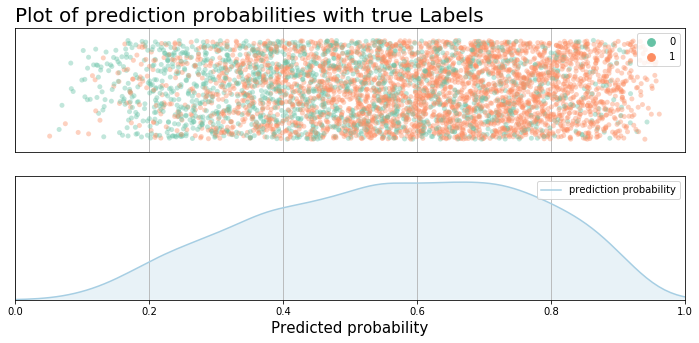

When recall is 75%, Precison is:  0.7616393442622951


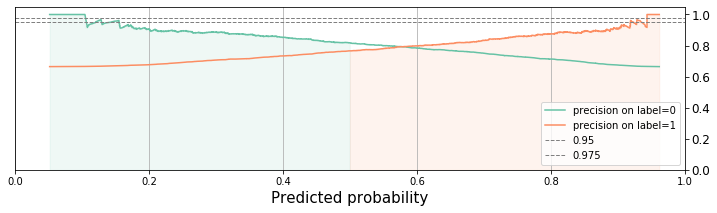

In [160]:
# evaluation metrics and visualization
y_pred_model = grid_search_lgbm.best_estimator_.predict(X_test_1)
y_prob_model = grid_search_lgbm.best_estimator_.predict_proba(X_test_1)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)
plot_probability_calibration(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

In [156]:
# try tensorflow

In [164]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [177]:
# import tensorflow as tf

In [167]:
X_train_pca.shape

(13974, 150)

In [168]:
model_1 = Sequential()
# our first dense layer
model_1.add(Dense(32, input_shape=(150,), activation="relu"))
# our second dense layer
model_1.add(Dense(16, activation="relu"))
# last layer is the output layer.
model_1.add(Dense(2, activation="softmax"))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                4832      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 5,394
Trainable params: 5,394
Non-trainable params: 0
_________________________________________________________________


In [179]:
model_1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [170]:
batch_size = 20
epochs = 20
# setting verbose=1 prints out some results after each epoch
history = model_1.fit(X_train_pca, y_train_1, 
            validation_data=(X_test_pca, y_test_1),
            batch_size=batch_size, epochs=epochs, verbose=1)

Train on 13974 samples, validate on 4658 samples
Epoch 1/20
13974/13974 [==============================] - 8s 570us/sample - loss: 0.6426 - accuracy: 0.6424 - val_loss: 0.6507 - val_accuracy: 0.6503
Epoch 2/20
13974/13974 [==============================] - 6s 431us/sample - loss: 0.6176 - accuracy: 0.6607 - val_loss: 0.6638 - val_accuracy: 0.6286
Epoch 3/20
13974/13974 [==============================] - 6s 433us/sample - loss: 0.6023 - accuracy: 0.6739 - val_loss: 0.6791 - val_accuracy: 0.6050
Epoch 4/20
13974/13974 [==============================] - 6s 434us/sample - loss: 0.5914 - accuracy: 0.6863 - val_loss: 0.6887 - val_accuracy: 0.6093
Epoch 5/20
13974/13974 [==============================] - 6s 425us/sample - loss: 0.5835 - accuracy: 0.6932 - val_loss: 0.7021 - val_accuracy: 0.6015
Epoch 6/20
13974/13974 [==============================] - 6s 432us/sample - loss: 0.5779 - accuracy: 0.6982 - val_loss: 0.7110 - val_accuracy: 0.5949
Epoch 7/20
13974/13974 [===========================

In [171]:
score_1 = model_1.evaluate(X_test_pca, y_test_1, verbose=0)
print('Test score:', score_1[0])
print('Test accuracy:', score_1[1])

Test score: 0.7408444224226981
Test accuracy: 0.5912409


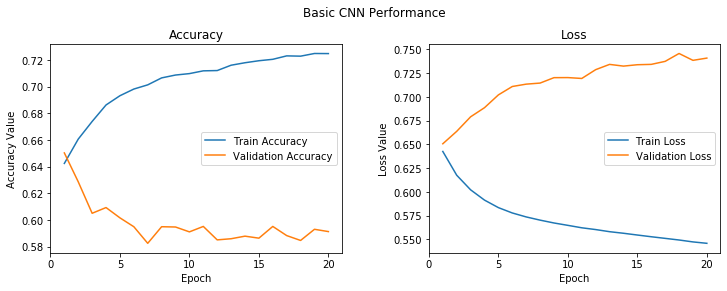

In [172]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))
try:
    ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
except:
    ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# kinda bad. 
apparently there is already some overfitting happened. We don't even have to try more sophiscated architecture. But just for experiment, let's see.

In [183]:
model_2 = Sequential()
# our first dense layer (with input layer)
model_2.add(Dense(1024, input_shape=(150,), activation="relu"))
# our second dense layer
model_2.add(Dense(512, activation="relu"))
# our third dense layer
model_2.add(Dense(256, activation="relu"))
# our fourth dense layer
model_2.add(Dense(128, activation="relu"))
# our fifth dense layer
model_2.add(Dense(64, activation="relu"))
# last layer is the output layer.
model_2.add(Dense(2, activation="softmax"))

In [185]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              154624    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 130       
Total params: 852,034
Trainable params: 852,034
Non-trainable params: 0
________________________________________________

In [186]:
model_2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [187]:
batch_size = 20
epochs = 20
# setting verbose=1 prints out some results after each epoch
history = model_2.fit(X_train_pca, y_train_1, 
            validation_data=(X_test_pca, y_test_1),
            batch_size=batch_size, epochs=epochs, verbose=1)

Train on 13974 samples, validate on 4658 samples
Epoch 1/20
13974/13974 [==============================] - 8s 545us/sample - loss: 0.6265 - accuracy: 0.6541 - val_loss: 0.6633 - val_accuracy: 0.6125
Epoch 2/20
13974/13974 [==============================] - 7s 482us/sample - loss: 0.5857 - accuracy: 0.6883 - val_loss: 0.6986 - val_accuracy: 0.6078
Epoch 3/20
13974/13974 [==============================] - 10s 699us/sample - loss: 0.5670 - accuracy: 0.7070 - val_loss: 0.7174 - val_accuracy: 0.5745
Epoch 4/20
13974/13974 [==============================] - 8s 550us/sample - loss: 0.5518 - accuracy: 0.7196 - val_loss: 0.7382 - val_accuracy: 0.5908
Epoch 5/20
13974/13974 [==============================] - 8s 545us/sample - loss: 0.5378 - accuracy: 0.7300 - val_loss: 0.7433 - val_accuracy: 0.5921
Epoch 6/20
13974/13974 [==============================] - 7s 482us/sample - loss: 0.5217 - accuracy: 0.7442 - val_loss: 0.7626 - val_accuracy: 0.5447
Epoch 7/20
13974/13974 [==========================

In [188]:
score_2 = model_2.evaluate(X_test_pca, y_test_1, verbose=0)
print('Test score:', score_1[0])
print('Test accuracy:', score_1[1])

Test score: 0.7408444224226981
Test accuracy: 0.5912409


In [189]:
# when trying more sophiscated architecture, the result is even worse, because it is overfitted
# as expected neural network is not very suitable for this task.

# multi-class target

In [190]:
from sklearn.metrics import label_ranking_average_precision_score

In [112]:
from sklearn.preprocessing import LabelEncoder
le_age_cate = LabelEncoder()
y_age_cate = le_age_cate.fit_transform(df_original['age_cate'])
le_age_cate.classes_

array(['A22-', 'A23-26', 'A27-28', 'A29-31', 'A32-40', 'A40+'],
      dtype=object)

In [113]:
y_train_2, y_test_2 = train_test_split(y_age_cate, test_size=2/10, random_state=RANDOM_STATE)
y_train_2, y_val_2 = train_test_split(y_train_2, test_size=2/8, random_state=RANDOM_STATE)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/10, random_state=RANDOM_STATE)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/8, random_state=RANDOM_STATE)


In [193]:
# train with the default model
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(   
    max_iter=1e4,     
    random_state= RANDOM_STATE, 
    multi_class='multinomial',) 
lr2.fit(X=X_train_pca, y=y_train_2)
lr2.get_params

print("accuracy on training set: {}".format(accuracy_score(y_true=y_train_2, y_pred=lr2.predict(X_train_pca))))
print("accuracy on validation set: {}".format(accuracy_score(y_true=y_val_2, y_pred=lr2.predict(X_val_pca))))

accuracy on training set: 0.3465006440532417
accuracy on validation set: 0.3069987118935165


In [208]:
print(classification_report(y_true=y_val_2, y_pred=lr2.predict(X_val_pca)))

              precision    recall  f1-score   support

           0       0.37      0.46      0.41       670
           1       0.25      0.27      0.26       774
           2       0.18      0.03      0.05       531
           3       0.22      0.09      0.12       777
           4       0.28      0.39      0.33      1018
           5       0.36      0.49      0.41       888

    accuracy                           0.31      4658
   macro avg       0.28      0.29      0.26      4658
weighted avg       0.28      0.31      0.28      4658



In [194]:
# print("average-precision on training set: {}".format(label_ranking_average_precision_score(y_true=y_train_2, y_score=lr2.predict(X_train_pca))))
# print("average-precision on validation set: {}".format(label_ranking_average_precision_score(y_true=y_val_2, y_score=lr2.predict(X_val_pca))))

In [195]:
# try random forest

In [196]:
# from sklearn.ensemble import RandomForestClassifier

rfc2 = RandomForestClassifier(random_state= RANDOM_STATE)
rfc2.fit(X=X_train_1, y=y_train_2)
y_pred_model = rfc2.predict(X_test_1)
y_prob_model = rfc2.predict_proba(X_test_1)[:,1]

print("accuracy on training set: {}".format(accuracy_score(y_true=y_train_2, y_pred=rfc2.predict(X_train_1))))
print("accuracy on test set: {}".format(accuracy_score(y_true=y_test_2, y_pred=rfc2.predict(X_test_1))))

accuracy on training set: 1.0
accuracy on test set: 0.19428939458995276


In [197]:
# try xgboost

In [198]:
xgbc2 = XGBClassifier(random_state=RANDOM_STATE, )
xgbc2.fit(X=X_train_1, y=y_train_2)
# xgbc2.get_params

print("accuracy on training set: {}".format(accuracy_score(y_true=y_train_2, y_pred=xgbc2.predict(X_train_1))))
print("accuracy on test set: {}".format(accuracy_score(y_true=y_test_2, y_pred=xgbc2.predict(X_test_1))))

accuracy on training set: 0.994275082295692
accuracy on test set: 0.17604121940747103


In [199]:
# try lightGBM

In [200]:
lgbm2 = LGBMClassifier(random_state=RANDOM_STATE, )
lgbm2.fit(X=X_train_1, y=y_train_2)
# xgbc2.get_params

print("accuracy on training set: {}".format(accuracy_score(y_true=y_train_2, y_pred=lgbm2.predict(X_train_1))))
print("accuracy on test set: {}".format(accuracy_score(y_true=y_test_2, y_pred=lgbm2.predict(X_test_1))))

accuracy on training set: 0.8950908830685559
accuracy on test set: 0.19171318162301418


In [201]:
# try gridCV again

In [202]:
# Gridsearch CV
# from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate':[  0.05, 0.1],
    'n_estimators':[50, 100, 150],
    'max_depth' : [10, -1],
    'min_child_samples': [ 8,20 ],
#     'min_samples_split':[ 8 ],
    'num_leaves':[10, 20, 30, ],
#     'max_depth': [ 3,  8, 12, ],
#     'min_samples_leaf': [ 4, 8, 16, ],
#     'min_samples_split':[ 2, 4, 8,],
#     'max_features':['auto', 0.9],
#     'tol': [1e-8, 1e-6,]
    
        
}
cv_num = 5
# Create a based model
lgbm_grid = LGBMClassifier()
# Instantiate the grid search model
# grid_search_lgbm2 = GridSearchCV(estimator = lgbm_grid, param_grid = param_grid, 
#                           cv = cv_num, 
#                           scoring='accuracy',
#                           n_jobs = -1, verbose = 1, )
grid_search_lgbm2 = RandomizedSearchCV(estimator = lgbm_grid, param_distributions = param_grid, n_iter=30,
                          cv = cv_num, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1, )

# Fit the random search model
_ = grid_search_lgbm2.fit(X_train_1, y_train_2)
# print(grid_search_lgbm2.best_score_)
# print(grid_search_lgbm2.best_estimator_.get_params)



Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 35.7min finished


In [203]:
print("accuracy on training set: {}".format(accuracy_score(y_true=y_train_2, y_pred=grid_search_lgbm.best_estimator_.predict(X_train_1))))
print("accuracy on test set: {}".format(accuracy_score(y_true=y_test_2, y_pred=grid_search_lgbm.best_estimator_.predict(X_test_1))))

accuracy on training set: 0.18026334621439816
accuracy on test set: 0.15822241305281237


In [204]:
# try MLP

In [211]:
model_3 = Sequential()
# our first dense layer
model_3.add(Dense(32, input_shape=(150,), activation="relu"))
# our second dense layer
model_3.add(Dense(16, activation="relu"))
# last layer is the output layer.
model_3.add(Dense(6, activation="softmax"))

model_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                4832      
_________________________________________________________________
dense_25 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 102       
Total params: 5,462
Trainable params: 5,462
Non-trainable params: 0
_________________________________________________________________


In [212]:
model_3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [213]:
atch_size = 20
epochs = 20
# setting verbose=1 prints out some results after each epoch
history = model_3.fit(X_train_pca, y_train_2, 
            validation_data=(X_test_pca, y_test_2),
            batch_size=batch_size, epochs=epochs, verbose=1)

Train on 13974 samples, validate on 4658 samples
Epoch 1/20
13974/13974 [==============================] - 2s 135us/sample - loss: 1.7544 - accuracy: 0.2296 - val_loss: 1.7186 - val_accuracy: 0.2497
Epoch 2/20
13974/13974 [==============================] - 2s 119us/sample - loss: 1.7026 - accuracy: 0.2674 - val_loss: 1.6882 - val_accuracy: 0.2855
Epoch 3/20
13974/13974 [==============================] - 2s 119us/sample - loss: 1.6731 - accuracy: 0.2862 - val_loss: 1.6685 - val_accuracy: 0.2995
Epoch 4/20
13974/13974 [==============================] - 2s 120us/sample - loss: 1.6532 - accuracy: 0.3014 - val_loss: 1.6564 - val_accuracy: 0.3036
Epoch 5/20
13974/13974 [==============================] - 2s 120us/sample - loss: 1.6394 - accuracy: 0.3068 - val_loss: 1.6492 - val_accuracy: 0.3113
Epoch 6/20
13974/13974 [==============================] - 2s 121us/sample - loss: 1.6303 - accuracy: 0.3134 - val_loss: 1.6466 - val_accuracy: 0.3089
Epoch 7/20
13974/13974 [===========================

In [222]:
y_pred = pd.DataFrame(model_3.predict(X_train_pca)).apply(lambda x: x.argmax(), axis=1).values
print(classification_report(y_true=y_train_2, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.39      0.50      0.44      1911
           1       0.28      0.42      0.33      2359
           2       0.27      0.01      0.01      1612
           3       0.25      0.05      0.09      2304
           4       0.33      0.48      0.39      3097
           5       0.43      0.46      0.45      2691

    accuracy                           0.34     13974
   macro avg       0.32      0.32      0.28     13974
weighted avg       0.33      0.34      0.30     13974



In [221]:
y_pred = pd.DataFrame(model_3.predict(X_val_pca)).apply(lambda x: x.argmax(), axis=1).values
print(classification_report(y_true=y_val_2, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.37      0.43      0.39       670
           1       0.25      0.40      0.31       774
           2       0.17      0.00      0.01       531
           3       0.22      0.05      0.07       777
           4       0.29      0.42      0.34      1018
           5       0.37      0.42      0.40       888

    accuracy                           0.31      4658
   macro avg       0.28      0.29      0.25      4658
weighted avg       0.28      0.31      0.27      4658



In [ ]:
# this is promising, let's try to make more layers

In [223]:
model_4 = Sequential()
# our first dense layer (with input layer)
model_4.add(Dense(1024, input_shape=(150,), activation="relu"))
# our second dense layer
model_4.add(Dense(512, activation="relu"))
# our third dense layer
model_4.add(Dense(256, activation="relu"))
# our fourth dense layer
model_4.add(Dense(128, activation="relu"))
# our fifth dense layer
model_4.add(Dense(64, activation="relu"))
# last layer is the output layer.
model_4.add(Dense(6, activation="softmax"))



In [224]:
model_4.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [225]:
batch_size = 20
epochs = 20
# setting verbose=1 prints out some results after each epoch
history = model_4.fit(X_train_pca, y_train_2, 
            validation_data=(X_test_pca, y_test_2),
            batch_size=batch_size, epochs=epochs, verbose=1)

Train on 13974 samples, validate on 4658 samples
Epoch 1/20
13974/13974 [==============================] - 2s 167us/sample - loss: 1.7518 - accuracy: 0.2259 - val_loss: 1.7162 - val_accuracy: 0.2428
Epoch 2/20
13974/13974 [==============================] - 2s 147us/sample - loss: 1.6830 - accuracy: 0.2838 - val_loss: 1.6641 - val_accuracy: 0.2905
Epoch 3/20
13974/13974 [==============================] - 2s 147us/sample - loss: 1.6379 - accuracy: 0.3114 - val_loss: 1.6469 - val_accuracy: 0.3057
Epoch 4/20
13974/13974 [==============================] - 2s 147us/sample - loss: 1.6152 - accuracy: 0.3214 - val_loss: 1.6485 - val_accuracy: 0.2988
Epoch 5/20
13974/13974 [==============================] - 2s 148us/sample - loss: 1.5969 - accuracy: 0.3323 - val_loss: 1.6424 - val_accuracy: 0.3177
Epoch 6/20
13974/13974 [==============================] - 2s 149us/sample - loss: 1.5795 - accuracy: 0.3461 - val_loss: 1.6393 - val_accuracy: 0.3152
Epoch 7/20
13974/13974 [===========================

In [226]:
y_pred = pd.DataFrame(model_4.predict(X_val_pca)).apply(lambda x: x.argmax(), axis=1).values
print(classification_report(y_true=y_val_2, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.35      0.25      0.29       670
           1       0.25      0.14      0.18       774
           2       0.12      0.05      0.07       531
           3       0.20      0.21      0.21       777
           4       0.26      0.40      0.32      1018
           5       0.29      0.38      0.33       888

    accuracy                           0.26      4658
   macro avg       0.25      0.24      0.23      4658
weighted avg       0.25      0.26      0.25      4658



# some comments
- when the number of target class increase, the learning become harder.
- since the age group is some how ordinal, we should take a advantage of that.
- later on, we will tacle a related task but a regression one.

# but first of all, let's try onevsRest

In [227]:
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(estimator = LGBMClassifier(), n_jobs=-1)

clf.fit(X_train_pca, y_train_2)

print("accuracy on training set: {}".format(accuracy_score(y_true=y_train_2, y_pred=clf.predict(X_train_pca))))
print("accuracy on validation set: {}".format(accuracy_score(y_true=y_val_2, y_pred=clf.predict(X_val_pca))))

accuracy on training set: 0.9673679690854444
accuracy on validation set: 0.29411764705882354


# would gridCV helps?
oneVsRest esitmator help to improve accuracy, but let's go further.

### note: in order to use OneVsRestClassifier inside gridSearchCV, the param_grid need to modeifed to add ''estimator__' in front. e.g. 'estimator__learning_rate' vs. 'learning_rate'

In [231]:
# Gridsearch CV
# from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimator__learning_rate':[  0.05, 0.1],
    'estimator__n_estimators':[50, 100, 150],
    'estimator__max_depth' : [3, 20, None],
    'estimator__min_samples_leaf': [ 8 ],
    'estimator__min_samples_split':[ 8 ],
    'estimator__max_features':[0.8, 0.9],
#     'max_depth': [ 3,  8, 12, ],
#     'min_samples_leaf': [ 4, 8, 16, ],
#     'min_samples_split':[ 2, 4, 8,],
#     'max_features':['auto', 0.9],
#     'tol': [1e-8, 1e-6,]
    
        
}
cv_num = 5
# Create a based model
clf = OneVsRestClassifier(estimator = LGBMClassifier(), n_jobs=-1)
# Instantiate the grid search model
# grid_search_lgbm3 = GridSearchCV(estimator = clf, param_grid = param_grid, 
#                           cv = cv_num, 
#                           scoring='accuracy',
#                           n_jobs = -1, verbose = 1, )
grid_search_lgbm3 = RandomizedSearchCV(estimator = clf, param_distributions = param_grid, n_iter=30,
                          cv = cv_num, 
                          scoring='accuracy',
                          n_jobs = -1, verbose = 1, )


# Fit the random search model
_ = grid_search_lgbm3.fit(X_train_1, y_train_2)
# print(grid_search_lgbm2.best_score_)
# print(grid_search_lgbm2.best_estimator_.get_params)

print("accuracy on training set: {}".format(accuracy_score(y_true=y_train_2, y_pred=grid_search_lgbm3.best_estimator_.predict(X_train_pca))))
print("accuracy on validation set: {}".format(accuracy_score(y_true=y_val_2, y_pred=grid_search_lgbm3.best_estimator_.predict(X_val_pca))))


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  9.6min finished


accuracy on training set: 0.46858451409760987
accuracy on validation set: 0.29325890940317734


In [232]:
print("accuracy on training set: {}".format(accuracy_score(y_true=y_train_2, y_pred=grid_search_lgbm3.best_estimator_.predict(X_train_pca))))
print("accuracy on validation set: {}".format(accuracy_score(y_true=y_val_2, y_pred=grid_search_lgbm3.best_estimator_.predict(X_val_pca))))

accuracy on training set: 0.46858451409760987
accuracy on validation set: 0.29325890940317734


In [234]:
print(classification_report(y_true=y_train_2, y_pred=grid_search_lgbm3.best_estimator_.predict(X_train_pca)))

              precision    recall  f1-score   support

           0       0.46      0.60      0.52      1911
           1       0.50      0.43      0.46      2359
           2       0.88      0.11      0.19      1612
           3       0.76      0.20      0.32      2304
           4       0.40      0.65      0.50      3097
           5       0.47      0.64      0.54      2691

    accuracy                           0.47     13974
   macro avg       0.58      0.44      0.42     13974
weighted avg       0.56      0.47      0.44     13974



In [233]:
print(classification_report(y_true=y_val_2, y_pred=grid_search_lgbm3.best_estimator_.predict(X_val_pca)))

              precision    recall  f1-score   support

           0       0.35      0.43      0.39       670
           1       0.28      0.23      0.25       774
           2       0.10      0.01      0.01       531
           3       0.14      0.02      0.04       777
           4       0.26      0.44      0.32      1018
           5       0.34      0.48      0.40       888

    accuracy                           0.29      4658
   macro avg       0.24      0.27      0.23      4658
weighted avg       0.25      0.29      0.25      4658



# regression task

In [84]:
y_train_regr = Y_train.age.values
y_val_regr = Y_val.age.values
y_test_regr = Y_test.age.values

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

# linear regression

In [86]:
from sklearn.linear_model import LinearRegression

lr_r = LinearRegression(   
#     max_iter=1e4,     
#     random_state= RANDOM_STATE, 
    ) 
lr_r.fit(X=X_train_pca, y=y_train_regr)
lr_r.get_params

print("MSE on training set: {}".format(mean_squared_error(y_true=y_train_regr, y_pred=lr_r.predict(X_train_pca))))
print("MSE on validation set: {}".format(mean_squared_error(y_true=y_val_regr, y_pred=lr_r.predict(X_val_pca))))

print("r2 on training set: {}".format(r2_score(y_true=y_train_regr, y_pred=lr_r.predict(X_train_pca))))
print("r2 on validation set: {}".format(r2_score(y_true=y_val_regr, y_pred=lr_r.predict(X_val_pca))))

MSE on training set: 76.92348431099633
MSE on validation set: 77.08067687010309
r2 on training set: 0.2068832836191452
r2 on validation set: 0.1861385642986484


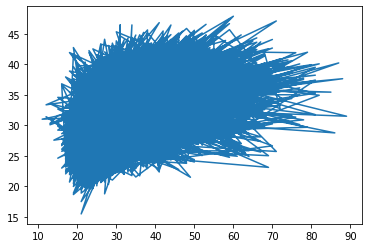

In [87]:
plt.plot(y_train_regr, lr_r.predict(X_train_pca))

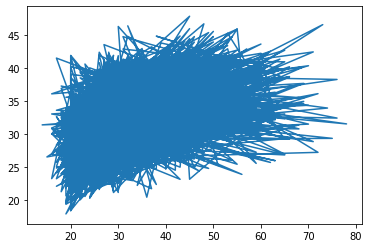

In [88]:
plt.plot(y_val_regr, lr_r.predict(X_val_pca))

In [89]:
## try lightgbm

In [90]:
from lightgbm import LGBMRegressor

lgbm_r = LGBMRegressor(   
#     max_iter=1e4,     
#     random_state= RANDOM_STATE, 
    ) 
lgbm_r.fit(X=X_train_pca, y=y_train_regr)
lgbm_r.get_params

print("MSE on training set: {}".format(mean_squared_error(y_true=y_train_regr, y_pred=lgbm_r.predict(X_train_pca))))
print("MSE on validation set: {}".format(mean_squared_error(y_true=y_val_regr, y_pred=lgbm_r.predict(X_val_pca))))

print("r2 on training set: {}".format(r2_score(y_true=y_train_regr, y_pred=lgbm_r.predict(X_train_pca))))
print("r2 on validation set: {}".format(r2_score(y_true=y_val_regr, y_pred=lgbm_r.predict(X_val_pca))))

MSE on training set: 42.92783773671472
MSE on validation set: 79.78308080603747
r2 on training set: 0.557394129867746
r2 on validation set: 0.15760505322360996


In [91]:
lgbm_r.get_params


<bound method LGBMModel.get_params of LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

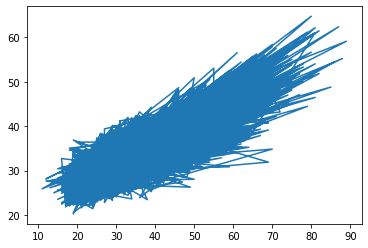

In [92]:
plt.plot(y_train_regr, lgbm_r.predict(X_train_pca))



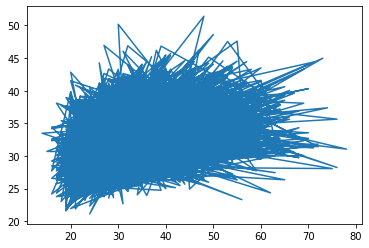

In [93]:
plt.plot(y_val_regr, lgbm_r.predict(X_val_pca))

In [96]:
# Gridsearch CV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'learning_rate':[  0.05, 0.1],
    'n_estimators':[50, 100,],
    'max_depth' : [3, 10, 20, 40],
#     'min_samples_leaf': [ 8, 16,  ],
    'min_samples_split':[ 8 ],
    'max_features':[0.8, 0.9],
#     'max_depth': [ 3,  8, 12, ],
#     'min_samples_leaf': [ 4, 8, 16, ],
#     'min_samples_split':[ 2, 4, 8,],
#     'max_features':['auto', 0.9],
#     'tol': [1e-8, 1e-6,]
    
        
}
cv_num = 5
# Create a based model
lgbm_grid = LGBMRegressor()
# Instantiate the grid search model
grid_search_lgbm_r = RandomizedSearchCV(estimator = lgbm_grid, param_distributions = param_grid, n_iter=30,
                          cv = cv_num, 
#                           scoring='l2',
                          n_jobs = -1, verbose = 1, )


# Fit the random search model
_ = grid_search_lgbm_r.fit(X_train_pca, y_train_regr)
print("MSE on training set: {}".format(mean_squared_error(y_true=y_train_regr, y_pred=grid_search_lgbm_r.predict(X_train_pca))))
print("MSE on validation set: {}".format(mean_squared_error(y_true=y_val_regr, y_pred=grid_search_lgbm_r.predict(X_val_pca))))

print("r2 on training set: {}".format(r2_score(y_true=y_train_regr, y_pred=grid_search_lgbm_r.predict(X_train_pca))))
print("r2 on validation set: {}".format(r2_score(y_true=y_val_regr, y_pred=grid_search_lgbm_r.predict(X_val_pca))))



Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.3min finished


MSE on training set: 71.60992482489401
MSE on validation set: 79.5263582154646
r2 on training set: 0.26166854054892497
r2 on validation set: 0.1603156757119507


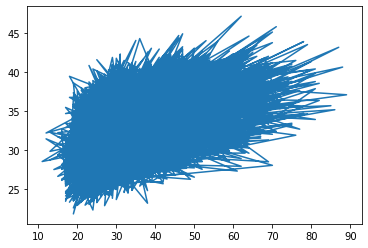

In [97]:
plt.plot(y_train_regr, grid_search_lgbm_r.predict(X_train_pca))

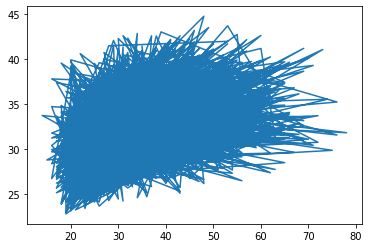

In [98]:
plt.plot(y_val_regr, grid_search_lgbm_r.predict(X_val_pca))

In [99]:
# transfer regression numbers to classes
pred = grid_search_lgbm_r.predict(X_val_pca)
pred

array([36.39339793, 35.28802811, 29.94560213, ..., 34.24465483,
       34.46743538, 34.82854841])

In [109]:
def my_fun(x):
    if x <=22:
        return 0
    elif x<=26:
        return 1
    elif x<=28:
        return 2
    elif x<=31:
        return 3
    elif x<40:
        return 4
    else:
        return 5

df_tmp = pd.DataFrame({'pred':pred}).pred.apply(my_fun)
df_tmp.head()

0    4
1    4
2    3
3    4
4    5
Name: pred, dtype: int64

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_val_2, y_pred=df_tmp.values))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       670
           1       0.21      0.03      0.06       774
           2       0.11      0.08      0.09       531
           3       0.17      0.28      0.21       777
           4       0.26      0.73      0.39      1018
           5       0.58      0.05      0.09       888

    accuracy                           0.23      4658
   macro avg       0.22      0.19      0.14      4658
weighted avg       0.25      0.23      0.16      4658



C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## some comment
when trying to transfer regression result to classification problem, the performance is worse than the original classification problem.

# End of supervised learning